In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import scipy
from datetime import datetime
import statsmodels.formula.api as smf

from matplotlib import style
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.font_manager import FontProperties
from pylab import mpl
import platform
import pyreadr

# 根据操作系统设置中文字体
system = platform.system()
if system == 'Windows':
    plt.rcParams['font.sans-serif'] = ['SimHei']  # Windows使用黑体
    plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
elif system == 'Darwin':  # macOS
    plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # macOS使用Arial Unicode MS
    plt.rcParams['axes.unicode_minus'] = False
else:  # Linux
    plt.rcParams['font.sans-serif'] = ['WenQuanYi Micro Hei']  # Linux使用文泉驿微米黑
    plt.rcParams['axes.unicode_minus'] = False

# 输出矢量图
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# 设置pandas显示选项
pd.set_option('display.max_columns', None)

print(f"当前操作系统: {system}")
print(f"字体设置: {plt.rcParams['font.sans-serif']}")

当前操作系统: Darwin
字体设置: ['Arial Unicode MS']


In [4]:
cross = pd.read_csv('/Users/liuwanting/Desktop/pythonhomework/TRD_Mnth202509.csv')
from pandas.tseries.offsets import MonthEnd
cross['month'] = pd.to_datetime(cross['Trdmnt'], format='%Y-%m') + MonthEnd(1)
cross['Stkcd'] = cross['Stkcd'].apply(lambda x: '{:0>6}'.format(x)) # 6位股票代码
cross.rename(columns={'Mretwd': 'Return', 'Msmvosd': 'floatingvalue', 'Msmvttl': 'totalvalue'}, inplace=True)

rf_data = pd.read_csv('/Users/liuwanting/Desktop/pythonhomework/Marketret_mon_stock2024.csv')
rf_data['month'] = pd.to_datetime(rf_data['month'], format='%b %Y') + MonthEnd(1)
rf_data = rf_data[['month', 'rfmonth']]

cross = pd.merge(cross, rf_data, on='month', how='left')

cross = cross.sort_values(by=['Stkcd', 'month'])
cross['list_month'] = cross.groupby('Stkcd').cumcount() + 1
cross['ret'] = cross['Return'] - cross['rfmonth']
cross['floatingvalue'] = cross['floatingvalue'] * 1000
cross['totalvalue'] = cross['totalvalue'] * 1000

cross

,Stkcd,Trdmnt,Opndt,Mopnprc,Clsdt,Mclsprc,Mnshrtrd,Mnvaltrd,floatingvalue,totalvalue,Ndaytrd,Return,Mretnd,Markettype,Capchgdt,Ahshrtrd_M,Ahvaltrd_M,month,rfmonth,list_month,ret
0,000001,1991-04,3,49.00,30,43.68,13400,6.150000e+05,1.157520e+09,2.118487e+09,20,NaN,NaN,4,1991-04-03,NaN,NaN,1991-04-30,0.006651,1,NaN
1,000001,1991-05,2,43.46,31,38.34,187800,7.675000e+06,1.016010e+09,1.859497e+09,24,-0.122253,0.235714,4,1991-04-03,NaN,NaN,1991-05-31,0.006092,2,-0.128345
2,000001,1991-06,1,38.53,28,33.99,30600,1.094000e+06,9.007350e+08,1.648521e+09,23,-0.113459,-0.113459,4,1991-04-03,NaN,NaN,1991-06-30,0.006092,3,-0.119551
3,000001,1991-07,1,33.65,31,29.54,6100,1.940430e+05,7.828100e+08,1.432695e+09,16,-0.130921,-0.130921,4,1991-04-03,NaN,NaN,1991-07-31,0.006092,4,-0.137013
4,000001,1991-08,1,29.39,31,15.00,3243100,4.957624e+07,6.748338e+08,1.346275e+09,15,-0.411588,-0.411587,4,1991-08-01,NaN,NaN,1991-08-31,0.006092,5,-0.417680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886908,920992,2025-05,6,20.00,30,20.46,92609592,1.922463e+09,5.707967e+08,1.979115e+09,19,0.051312,0.051715,64,2023-04-25,0.0,0.0,2025-05-31,NaN,32,NaN
886909,920992,2025-06,3,20.40,30,21.26,73152031,1.580767e+09,5.931152e+08,2.056500e+09,20,0.039101,0.039101,64,2023-04-25,0.0,0.0,2025-06-30,NaN,33,NaN
886910,920992,2025-07,1,21.13,31,22.44,96064221,2.126994e+09,6.260351e+08,2.170642e+09,23,0.055503,0.055503,64,2023-04-25,0.0,0.0,2025-07-31,NaN,34,NaN
886911,920992,2025-08,1,22.12,29,21.65,63953451,1.432608e+09,6.039955e+08,2.094225e+09,21,-0.035205,-0.035205,64,2023-04-25,0.0,0.0,2025-08-31,NaN,35,NaN


In [5]:
all_months = pd.DataFrame(cross['month'].unique(), columns=['month'])
all_stocks = pd.DataFrame(cross['Stkcd'].unique(), columns=['Stkcd'])
full_index = all_stocks.merge(all_months, how='cross')

cross_full = full_index.merge(cross, on=['Stkcd', 'month'], how='left')
cross_full = cross_full.sort_values(['Stkcd', 'month'])
cross_full['next_ret'] = cross_full.groupby('Stkcd')['ret'].shift(-1)

cross = cross.merge(cross_full[['Stkcd', 'month', 'next_ret']],
                    on=['Stkcd', 'month'], how='right')

cross['Cumsum_tradingday'] = cross.groupby('Stkcd')['Ndaytrd'].transform(lambda x: x.rolling(window=12, min_periods=1).sum())
print("方法1完成：补全日期序列后使用shift")

cross = cross[(cross['month'] >= '1995-01-31') & (cross['month'] <= '2024-12-31')]
cross

方法1完成：补全日期序列后使用shift


,Stkcd,Trdmnt,Opndt,Mopnprc,Clsdt,Mclsprc,Mnshrtrd,Mnvaltrd,floatingvalue,totalvalue,Ndaytrd,Return,Mretnd,Markettype,Capchgdt,Ahshrtrd_M,Ahvaltrd_M,month,rfmonth,list_month,ret,next_ret,Cumsum_tradingday
49,000001,1995-01,3.0,10.50,27.0,10.54,17488100.0,1.867690e+08,3.134297e+09,4.543463e+09,19.0,0.005725,0.005725,4.0,1994-09-02,NaN,NaN,1995-01-31,0.008719,46.0,-0.002994,-0.000180,247.0
50,000001,1995-02,13.0,10.60,28.0,10.63,8544200.0,9.192790e+07,3.161060e+09,4.582260e+09,12.0,0.008539,0.008539,4.0,1994-09-02,NaN,NaN,1995-02-28,0.008719,47.0,-0.000180,0.003511,244.0
51,000001,1995-03,1.0,10.63,31.0,10.76,18810600.0,2.059094e+08,3.199719e+09,4.638299e+09,23.0,0.012230,0.012230,4.0,1994-09-02,NaN,NaN,1995-03-31,0.008719,48.0,0.003511,-0.108161,244.0
52,000001,1995-04,3.0,10.78,28.0,9.69,13235500.0,1.380604e+08,2.881531e+09,4.177055e+09,20.0,-0.099442,-0.099442,4.0,1994-09-02,NaN,NaN,1995-04-30,0.008719,49.0,-0.108161,0.002633,243.0
53,000001,1995-05,2.0,9.69,31.0,9.80,53197900.0,6.049730e+08,2.914242e+09,4.224473e+09,22.0,0.011352,0.011352,4.0,1994-09-02,NaN,NaN,1995-05-31,0.008719,50.0,0.002633,-0.073005,244.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2453228,920992,2024-08,1.0,8.50,30.0,8.19,14436632.0,1.185912e+08,2.284861e+08,7.922264e+08,22.0,-0.037603,-0.037603,64.0,2023-04-25,0.0,0.0,2024-08-31,0.001118,23.0,-0.038721,0.276049,242.0
2453229,920992,2024-09,2.0,8.15,30.0,10.46,18109819.0,1.566140e+08,2.918149e+08,1.011806e+09,19.0,0.277167,0.277167,64.0,2023-04-25,0.0,0.0,2024-09-30,0.001118,24.0,0.276049,0.389895,241.0
2453230,920992,2024-10,8.0,13.02,31.0,14.55,86774237.0,1.145494e+09,4.059185e+08,1.407435e+09,18.0,0.391013,0.391013,64.0,2023-04-25,0.0,0.0,2024-10-31,0.001118,25.0,0.389895,0.241494,242.0
2453231,920992,2024-11,1.0,14.69,29.0,18.08,130783392.0,2.346534e+09,5.043990e+08,1.748895e+09,21.0,0.242612,0.242612,64.0,2023-04-25,0.0,0.0,2024-11-30,0.001118,26.0,0.241494,-0.243928,241.0


In [7]:
from pandas.tseries.offsets import MonthEnd # 月末
Market_ret = pd.read_csv('/Users/liuwanting/Desktop/pythonhomework/Marketret_mon_stock2024.csv')
Market_ret['month'] = pd.to_datetime(Market_ret['month'], format='%b %Y') + MonthEnd(0)
Market_ret.set_index('month', inplace=True)
Market_ret.sort_index(inplace=True)
Market_ret = Market_ret.drop(columns=['Unnamed: 0'])
Market_ret.rename(columns={'ret': 'MKT'}, inplace=True)
Market_ret

,MarketR,MarketR_e,rfmonth,MKT,ret_e,marketret3,marketret6,marketret12,Q
month,,,,,,,,,
1991-01-31,0.029998,0.036554,0.006930,0.023068,0.029624,-0.084127,-0.305662,0.254049,1991 Q1
1991-02-28,0.010203,0.021860,0.006930,0.003273,0.014930,-0.183573,-0.384745,0.241492,1991 Q1
1991-03-31,-0.099663,-0.060425,0.006930,-0.106593,-0.067355,-0.252928,-0.445049,0.288857,1991 Q1
1991-04-30,-0.079652,-0.031449,0.006651,-0.086303,-0.038100,-0.234776,-0.394937,0.691749,1991 Q2
1991-05-31,-0.074521,0.005375,0.006092,-0.080613,-0.000717,-0.236294,0.181673,1.542701,1991 Q2
...,...,...,...,...,...,...,...,...,...
2024-08-31,-0.031468,-0.033685,0.001118,-0.032586,-0.034803,0.151050,NaN,NaN,2024 Q3
2024-09-30,0.195992,0.227078,0.001118,0.194874,0.225960,0.200147,NaN,NaN,2024 Q3
2024-10-31,-0.003409,0.070220,0.001118,-0.004527,0.069102,0.000228,NaN,NaN,2024 Q4


In [8]:
cross = pd.merge(cross,Market_ret[['MKT']],left_on='month',right_on='month',how='left')
cross

,Stkcd,Trdmnt,Opndt,Mopnprc,Clsdt,Mclsprc,Mnshrtrd,Mnvaltrd,floatingvalue,totalvalue,Ndaytrd,Return,Mretnd,Markettype,Capchgdt,Ahshrtrd_M,Ahvaltrd_M,month,rfmonth,list_month,ret,next_ret,Cumsum_tradingday,MKT
0,000001,1995-01,3.0,10.50,27.0,10.54,17488100.0,1.867690e+08,3.134297e+09,4.543463e+09,19.0,0.005725,0.005725,4.0,1994-09-02,NaN,NaN,1995-01-31,0.008719,46.0,-0.002994,-0.000180,247.0,-0.125017
1,000001,1995-02,13.0,10.60,28.0,10.63,8544200.0,9.192790e+07,3.161060e+09,4.582260e+09,12.0,0.008539,0.008539,4.0,1994-09-02,NaN,NaN,1995-02-28,0.008719,47.0,-0.000180,0.003511,244.0,-0.022778
2,000001,1995-03,1.0,10.63,31.0,10.76,18810600.0,2.059094e+08,3.199719e+09,4.638299e+09,23.0,0.012230,0.012230,4.0,1994-09-02,NaN,NaN,1995-03-31,0.008719,48.0,0.003511,-0.108161,244.0,0.122163
3,000001,1995-04,3.0,10.78,28.0,9.69,13235500.0,1.380604e+08,2.881531e+09,4.177055e+09,20.0,-0.099442,-0.099442,4.0,1994-09-02,NaN,NaN,1995-04-30,0.008719,49.0,-0.108161,0.002633,243.0,-0.113023
4,000001,1995-05,2.0,9.69,31.0,9.80,53197900.0,6.049730e+08,2.914242e+09,4.224473e+09,22.0,0.011352,0.011352,4.0,1994-09-02,NaN,NaN,1995-05-31,0.008719,50.0,0.002633,-0.073005,244.0,0.166736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2112835,920992,2024-08,1.0,8.50,30.0,8.19,14436632.0,1.185912e+08,2.284861e+08,7.922264e+08,22.0,-0.037603,-0.037603,64.0,2023-04-25,0.0,0.0,2024-08-31,0.001118,23.0,-0.038721,0.276049,242.0,-0.032586
2112836,920992,2024-09,2.0,8.15,30.0,10.46,18109819.0,1.566140e+08,2.918149e+08,1.011806e+09,19.0,0.277167,0.277167,64.0,2023-04-25,0.0,0.0,2024-09-30,0.001118,24.0,0.276049,0.389895,241.0,0.194874
2112837,920992,2024-10,8.0,13.02,31.0,14.55,86774237.0,1.145494e+09,4.059185e+08,1.407435e+09,18.0,0.391013,0.391013,64.0,2023-04-25,0.0,0.0,2024-10-31,0.001118,25.0,0.389895,0.241494,242.0,-0.004527
2112838,920992,2024-11,1.0,14.69,29.0,18.08,130783392.0,2.346534e+09,5.043990e+08,1.748895e+09,21.0,0.242612,0.242612,64.0,2023-04-25,0.0,0.0,2024-11-30,0.001118,26.0,0.241494,-0.243928,241.0,0.008606


In [9]:
EP = pd.read_csv('/Users/liuwanting/Desktop/pythonhomework/EP_individual_mon2024.csv')
EP['Stkcd'] = EP['Stkcd'].apply(lambda x: '{:0>6}'.format(x))

EP['year'] = EP['month'].astype(int)
EP['month_decimal'] = EP['month'] - EP['year']
EP['month_num'] = (EP['month_decimal'] * 12).round().astype(int) + 1
EP.loc[EP['month_num'] > 12, 'year'] += 1
EP.loc[EP['month_num'] > 12, 'month_num'] -= 12
EP['month'] = pd.to_datetime(EP['year'].astype(str) + '-' + EP['month_num'].astype(str) + '-01')
EP = EP.drop(['year', 'month_decimal', 'month_num'], axis=1)
EP['month'] = EP['month'] + MonthEnd(1)
EP = EP[['Stkcd', 'month', 'ep', 'ep_recent']]
EP

,Stkcd,month,ep,ep_recent
0,000001,1991-04-30,NaN,NaN
1,000001,1991-05-31,NaN,NaN
2,000001,1991-06-30,NaN,NaN
3,000001,1991-07-31,NaN,NaN
4,000001,1991-08-31,NaN,NaN
...,...,...,...,...
809599,605599,2024-08-31,0.079184,0.046498
809600,605599,2024-09-30,0.071525,0.042001
809601,605599,2024-10-31,0.077932,0.063816
809602,605599,2024-11-30,0.072171,0.059100


In [10]:
cross = pd.merge(cross,EP[['Stkcd','month','ep','ep_recent']],on=['Stkcd','month'],how='left')
cross

,Stkcd,Trdmnt,Opndt,Mopnprc,Clsdt,Mclsprc,Mnshrtrd,Mnvaltrd,floatingvalue,totalvalue,Ndaytrd,Return,Mretnd,Markettype,Capchgdt,Ahshrtrd_M,Ahvaltrd_M,month,rfmonth,list_month,ret,next_ret,Cumsum_tradingday,MKT,ep,ep_recent
0,000001,1995-01,3.0,10.50,27.0,10.54,17488100.0,1.867690e+08,3.134297e+09,4.543463e+09,19.0,0.005725,0.005725,4.0,1994-09-02,NaN,NaN,1995-01-31,0.008719,46.0,-0.002994,-0.000180,247.0,-0.125017,0.078427,0.078427
1,000001,1995-02,13.0,10.60,28.0,10.63,8544200.0,9.192790e+07,3.161060e+09,4.582260e+09,12.0,0.008539,0.008539,4.0,1994-09-02,NaN,NaN,1995-02-28,0.008719,47.0,-0.000180,0.003511,244.0,-0.022778,0.077763,0.077763
2,000001,1995-03,1.0,10.63,31.0,10.76,18810600.0,2.059094e+08,3.199719e+09,4.638299e+09,23.0,0.012230,0.012230,4.0,1994-09-02,NaN,NaN,1995-03-31,0.008719,48.0,0.003511,-0.108161,244.0,0.122163,0.076823,0.076823
3,000001,1995-04,3.0,10.78,28.0,9.69,13235500.0,1.380604e+08,2.881531e+09,4.177055e+09,20.0,-0.099442,-0.099442,4.0,1994-09-02,NaN,NaN,1995-04-30,0.008719,49.0,-0.108161,0.002633,243.0,-0.113023,0.085306,0.085306
4,000001,1995-05,2.0,9.69,31.0,9.80,53197900.0,6.049730e+08,2.914242e+09,4.224473e+09,22.0,0.011352,0.011352,4.0,1994-09-02,NaN,NaN,1995-05-31,0.008719,50.0,0.002633,-0.073005,244.0,0.166736,0.084349,0.084349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2112835,920992,2024-08,1.0,8.50,30.0,8.19,14436632.0,1.185912e+08,2.284861e+08,7.922264e+08,22.0,-0.037603,-0.037603,64.0,2023-04-25,0.0,0.0,2024-08-31,0.001118,23.0,-0.038721,0.276049,242.0,-0.032586,NaN,NaN
2112836,920992,2024-09,2.0,8.15,30.0,10.46,18109819.0,1.566140e+08,2.918149e+08,1.011806e+09,19.0,0.277167,0.277167,64.0,2023-04-25,0.0,0.0,2024-09-30,0.001118,24.0,0.276049,0.389895,241.0,0.194874,NaN,NaN
2112837,920992,2024-10,8.0,13.02,31.0,14.55,86774237.0,1.145494e+09,4.059185e+08,1.407435e+09,18.0,0.391013,0.391013,64.0,2023-04-25,0.0,0.0,2024-10-31,0.001118,25.0,0.389895,0.241494,242.0,-0.004527,NaN,NaN
2112838,920992,2024-11,1.0,14.69,29.0,18.08,130783392.0,2.346534e+09,5.043990e+08,1.748895e+09,21.0,0.242612,0.242612,64.0,2023-04-25,0.0,0.0,2024-11-30,0.001118,26.0,0.241494,-0.243928,241.0,0.008606,NaN,NaN


In [11]:
fenweishu = pd.DataFrame(
    cross.groupby(['month'])['totalvalue'].quantile(0.3))
fenweishu.columns = ['fenweishu_guimo']
fenweishu

,fenweishu_guimo
month,
1995-01-31,3.958033e+08
1995-02-28,3.907805e+08
1995-03-31,4.341120e+08
1995-04-30,3.835094e+08
1995-05-31,4.590161e+08
...,...
2024-08-31,2.442662e+09
2024-09-30,3.012217e+09
2024-10-31,3.234660e+09


In [12]:
cross_new = pd.merge(cross,fenweishu,on='month',how='left')
cross_new = cross_new[cross_new['totalvalue'] > cross_new['fenweishu_guimo']]
cross_new = cross_new[cross_new['Ndaytrd'] >= 7]

cross_new = cross_new[cross_new['list_month'] > 6]
cross_new = cross_new[cross_new['Cumsum_tradingday'] >= 120]
cross_new = cross_new[(cross_new['Markettype'] == 1) | (cross_new['Markettype'] == 4) | (cross_new['Markettype'] == 16)]
cross_new = cross_new.dropna(subset=['ep'])
cross_new

,Stkcd,Trdmnt,Opndt,Mopnprc,Clsdt,Mclsprc,Mnshrtrd,Mnvaltrd,floatingvalue,totalvalue,Ndaytrd,Return,Mretnd,Markettype,Capchgdt,Ahshrtrd_M,Ahvaltrd_M,month,rfmonth,list_month,ret,next_ret,Cumsum_tradingday,MKT,ep,ep_recent,fenweishu_guimo
0,000001,1995-01,3.0,10.50,27.0,10.54,17488100.0,1.867690e+08,3.134297e+09,4.543463e+09,19.0,0.005725,0.005725,4.0,1994-09-02,NaN,NaN,1995-01-31,0.008719,46.0,-0.002994,-0.000180,247.0,-0.125017,0.078427,0.078427,3.958033e+08
1,000001,1995-02,13.0,10.60,28.0,10.63,8544200.0,9.192790e+07,3.161060e+09,4.582260e+09,12.0,0.008539,0.008539,4.0,1994-09-02,NaN,NaN,1995-02-28,0.008719,47.0,-0.000180,0.003511,244.0,-0.022778,0.077763,0.077763,3.907805e+08
2,000001,1995-03,1.0,10.63,31.0,10.76,18810600.0,2.059094e+08,3.199719e+09,4.638299e+09,23.0,0.012230,0.012230,4.0,1994-09-02,NaN,NaN,1995-03-31,0.008719,48.0,0.003511,-0.108161,244.0,0.122163,0.076823,0.076823,4.341120e+08
3,000001,1995-04,3.0,10.78,28.0,9.69,13235500.0,1.380604e+08,2.881531e+09,4.177055e+09,20.0,-0.099442,-0.099442,4.0,1994-09-02,NaN,NaN,1995-04-30,0.008719,49.0,-0.108161,0.002633,243.0,-0.113023,0.085306,0.085306,3.835094e+08
4,000001,1995-05,2.0,9.69,31.0,9.80,53197900.0,6.049730e+08,2.914242e+09,4.224473e+09,22.0,0.011352,0.011352,4.0,1994-09-02,NaN,NaN,1995-05-31,0.008719,50.0,0.002633,-0.073005,244.0,0.166736,0.084349,0.084349,4.590161e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1779475,605599,2024-08,1.0,11.51,30.0,10.74,60492042.0,6.675452e+08,6.300920e+09,8.353334e+09,22.0,-0.065274,-0.065274,1.0,2022-09-09,0.0,0.0,2024-08-31,0.001118,36.0,-0.066392,0.105958,242.0,-0.032586,0.079184,0.046498,2.442662e+09
1779476,605599,2024-09,2.0,10.56,30.0,11.89,68255221.0,7.093424e+08,9.247778e+09,9.247778e+09,19.0,0.107076,0.107076,1.0,2024-09-09,0.0,0.0,2024-09-30,0.001118,37.0,0.105958,-0.105407,241.0,0.194874,0.071525,0.042001,3.012217e+09
1779477,605599,2024-10,8.0,12.91,31.0,10.65,100720810.0,1.106652e+09,8.283334e+09,8.283334e+09,18.0,-0.104289,-0.104289,1.0,2024-09-09,0.0,0.0,2024-10-31,0.001118,38.0,-0.105407,0.078694,242.0,-0.004527,0.077932,0.063816,3.234660e+09
1779478,605599,2024-11,1.0,10.63,29.0,11.50,108258572.0,1.199394e+09,8.944445e+09,8.944445e+09,21.0,0.079812,0.079812,1.0,2024-09-09,0.0,0.0,2024-11-30,0.001118,39.0,0.078694,-0.014161,241.0,0.008606,0.072171,0.059100,3.392681e+09


### 特质波动率

In [13]:
ret_day = pd.read_csv('/Users/liuwanting/Desktop/pythonhomework/ret_day2024.csv')
ret_day['Stkcd'] = ret_day['Stkcd'].apply(lambda x: '{:0>6}'.format(x))
ret_day['Day'] = pd.to_datetime(ret_day['Day'], format='%Y-%m-%d')
ret_day['month'] = ret_day['Day'] + MonthEnd(0)
ret_day

,Day,Stkcd,y,Q,month,Opnprc,Hiprc,Loprc,Clsprc,TradingVolume,TradingMoney,CirculationValue,TotalValue,Return_1,Return_2,Adjprcwd,Adjprcnd,Markettype,Capchgdt,Trdsta,Ahshrtrd_D,Ahvaltrd_D,PreClosePrice,ChangeRatio,LimitDown,LimitUp,LimitStatus,All_shares,A_float_shares,H_float_shares,Pre_shares,ratio,Freq,Freq_Q,Freq_y,yuemo,jimo,rfday,r
0,1990-12-19,600601,1990,1990.75,1990-12-31,185.30,185.30,185.30,185.30,200.0,37060.0,1.686230e+08,1.853000e+08,2.706000,2.706000,185.300000,185.300000,1,1990-12-19,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000000.0,910000.0,0.0,0.0,0.910000,8,8,8,0,0,0.000227,2.705773
1,1990-12-19,600602,1990,1990.75,1990-12-31,365.70,384.00,365.70,384.00,1160.0,443610.0,1.885440e+08,7.680000e+08,2.840000,2.840000,384.000000,384.000000,1,1990-12-19,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000000.0,491000.0,0.0,0.0,0.245500,8,8,8,0,0,0.000227,2.839773
2,1990-12-19,600651,1990,1990.75,1990-12-31,320.30,320.30,320.30,320.30,2.0,640.6,1.056990e+07,1.056990e+07,3.575714,3.575714,320.300000,320.300000,1,1990-12-19,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33000.0,33000.0,0.0,0.0,1.000000,8,8,8,0,0,0.000227,3.575487
3,1990-12-19,600656,1990,1990.75,1990-12-31,260.00,260.00,260.00,260.00,50.0,13000.0,1.170286e+08,6.412952e+08,1.600000,1.600000,260.000000,260.000000,1,1990-12-19,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2466520.0,450110.0,0.0,0.0,0.182488,5,5,5,0,0,0.000227,1.599773
4,1990-12-20,600601,1990,1990.75,1990-12-31,185.30,194.60,185.30,194.60,84.0,16160.4,1.770860e+08,1.946000e+08,0.050189,0.050189,194.600000,194.600000,1,1990-12-19,1,NaN,NaN,185.30,0.050189,NaN,NaN,0.0,1000000.0,910000.0,0.0,0.0,0.910000,8,8,8,0,0,0.000227,0.049962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14662441,2024-12-31,605580,2024,2024.75,2024-12-31,10.07,11.08,10.06,11.08,7669759.0,84447640.0,3.102400e+09,3.102400e+09,0.100298,0.100298,17.474255,15.511980,1,2024-08-26,1,0.0,0.0,10.07,0.100298,9.06,11.08,1.0,280000000.0,280000000.0,0.0,0.0,1.000000,22,61,242,1,1,0.000037,0.100261
14662442,2024-12-31,605588,2024,2024.75,2024-12-31,42.01,42.45,40.63,40.76,1342400.0,55579476.0,2.979538e+09,2.995151e+09,-0.034809,-0.034809,41.098544,40.759952,1,2024-12-17,1,0.0,0.0,42.23,-0.034809,38.01,46.45,0.0,73482601.0,73099561.0,0.0,0.0,0.994787,22,61,242,1,1,0.000037,-0.034846
14662443,2024-12-31,605589,2024,2024.75,2024-12-31,24.28,24.36,23.51,23.58,8651436.0,206018788.0,1.835846e+10,1.995943e+10,-0.022388,-0.022388,24.775919,23.579966,1,2024-11-07,1,0.0,0.0,24.12,-0.022388,21.71,26.53,0.0,846455998.0,778560800.0,0.0,0.0,0.919789,22,61,242,1,1,0.000037,-0.022425
14662444,2024-12-31,605598,2024,2024.75,2024-12-31,20.90,22.99,20.37,22.41,11167299.0,245155786.0,5.446007e+09,5.507500e+09,0.072249,0.072249,31.807557,31.373944,1,2024-09-26,1,0.0,0.0,20.90,0.072249,18.81,22.99,0.0,245760841.0,243016841.0,0.0,0.0,0.988835,22,61,242,1,1,0.000037,0.072212


In [14]:
fama3 = pyreadr.read_r('/Users/liuwanting/Desktop/pythonhomework/FF3_daily2024.RDS')[None]
fama3['Day'] = pd.to_datetime(fama3['Day'], format='%Y-%m-%d')
fama3.rename(columns={'mkt.ff': 'MKT', 'smb.ff': 'SMB', 'hml.ff': 'HML'}, inplace=True)
fama3

,Day,MKT,SMB,HML
0,1995-01-03,-0.009724,0.001605,-0.001592
1,1995-01-04,0.023004,-0.004303,0.006382
2,1995-01-05,-0.009166,-0.004228,0.004423
3,1995-01-06,-0.007825,0.003721,0.006375
4,1995-01-09,-0.027512,0.001165,0.005851
...,...,...,...,...
7279,2024-12-25,-0.003003,-0.023692,0.009211
7280,2024-12-26,0.002310,0.011929,-0.011406
7281,2024-12-27,0.001099,0.008671,0.007060
7282,2024-12-30,0.001373,-0.017230,0.004754


In [15]:
ret_day = ret_day.merge(fama3[['Day','MKT','SMB','HML']],on='Day',how='left')
ret_day

,Day,Stkcd,y,Q,month,Opnprc,Hiprc,Loprc,Clsprc,TradingVolume,TradingMoney,CirculationValue,TotalValue,Return_1,Return_2,Adjprcwd,Adjprcnd,Markettype,Capchgdt,Trdsta,Ahshrtrd_D,Ahvaltrd_D,PreClosePrice,ChangeRatio,LimitDown,LimitUp,LimitStatus,All_shares,A_float_shares,H_float_shares,Pre_shares,ratio,Freq,Freq_Q,Freq_y,yuemo,jimo,rfday,r,MKT,SMB,HML
0,1990-12-19,600601,1990,1990.75,1990-12-31,185.30,185.30,185.30,185.30,200.0,37060.0,1.686230e+08,1.853000e+08,2.706000,2.706000,185.300000,185.300000,1,1990-12-19,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000000.0,910000.0,0.0,0.0,0.910000,8,8,8,0,0,0.000227,2.705773,NaN,NaN,NaN
1,1990-12-19,600602,1990,1990.75,1990-12-31,365.70,384.00,365.70,384.00,1160.0,443610.0,1.885440e+08,7.680000e+08,2.840000,2.840000,384.000000,384.000000,1,1990-12-19,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000000.0,491000.0,0.0,0.0,0.245500,8,8,8,0,0,0.000227,2.839773,NaN,NaN,NaN
2,1990-12-19,600651,1990,1990.75,1990-12-31,320.30,320.30,320.30,320.30,2.0,640.6,1.056990e+07,1.056990e+07,3.575714,3.575714,320.300000,320.300000,1,1990-12-19,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33000.0,33000.0,0.0,0.0,1.000000,8,8,8,0,0,0.000227,3.575487,NaN,NaN,NaN
3,1990-12-19,600656,1990,1990.75,1990-12-31,260.00,260.00,260.00,260.00,50.0,13000.0,1.170286e+08,6.412952e+08,1.600000,1.600000,260.000000,260.000000,1,1990-12-19,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2466520.0,450110.0,0.0,0.0,0.182488,5,5,5,0,0,0.000227,1.599773,NaN,NaN,NaN
4,1990-12-20,600601,1990,1990.75,1990-12-31,185.30,194.60,185.30,194.60,84.0,16160.4,1.770860e+08,1.946000e+08,0.050189,0.050189,194.600000,194.600000,1,1990-12-19,1,NaN,NaN,185.30,0.050189,NaN,NaN,0.0,1000000.0,910000.0,0.0,0.0,0.910000,8,8,8,0,0,0.000227,0.049962,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14662441,2024-12-31,605580,2024,2024.75,2024-12-31,10.07,11.08,10.06,11.08,7669759.0,84447640.0,3.102400e+09,3.102400e+09,0.100298,0.100298,17.474255,15.511980,1,2024-08-26,1,0.0,0.0,10.07,0.100298,9.06,11.08,1.0,280000000.0,280000000.0,0.0,0.0,1.000000,22,61,242,1,1,0.000037,0.100261,-0.017476,-0.008591,0.009624
14662442,2024-12-31,605588,2024,2024.75,2024-12-31,42.01,42.45,40.63,40.76,1342400.0,55579476.0,2.979538e+09,2.995151e+09,-0.034809,-0.034809,41.098544,40.759952,1,2024-12-17,1,0.0,0.0,42.23,-0.034809,38.01,46.45,0.0,73482601.0,73099561.0,0.0,0.0,0.994787,22,61,242,1,1,0.000037,-0.034846,-0.017476,-0.008591,0.009624
14662443,2024-12-31,605589,2024,2024.75,2024-12-31,24.28,24.36,23.51,23.58,8651436.0,206018788.0,1.835846e+10,1.995943e+10,-0.022388,-0.022388,24.775919,23.579966,1,2024-11-07,1,0.0,0.0,24.12,-0.022388,21.71,26.53,0.0,846455998.0,778560800.0,0.0,0.0,0.919789,22,61,242,1,1,0.000037,-0.022425,-0.017476,-0.008591,0.009624
14662444,2024-12-31,605598,2024,2024.75,2024-12-31,20.90,22.99,20.37,22.41,11167299.0,245155786.0,5.446007e+09,5.507500e+09,0.072249,0.072249,31.807557,31.373944,1,2024-09-26,1,0.0,0.0,20.90,0.072249,18.81,22.99,0.0,245760841.0,243016841.0,0.0,0.0,0.988835,22,61,242,1,1,0.000037,0.072212,-0.017476,-0.008591,0.009624


## 特质波动率 (Idiosyncratic Volatility, IVOL)

In [16]:
from tqdm import tqdm
import statsmodels.api as sm
import time

# 定义一个函数来计算滚动特质波动率
def rolling_ivol_per_stock(data, k=2):
    """
    计算滚动特质波动率
    参数:
        data: 包含日度数据的DataFrame
        k: 回溯月数，使用 t-k 到 t 月共 k+1 个月的数据
    """
    # 至少需要10个日度观测值
    min_periods = 10
    print(f"IVOL估计设置:")
    print(f"  回溯月数 k: {k} (使用 t-{k} 到 t 月共 {k+1} 个月的数据)")
    print(f"  最少需要: {min_periods} 个日度观测值")
    print("="*60)

    ivols = []
    months = []
    Stkcds = []
    data_counts = []

    # 按股票分组
    grouped = data.groupby('Stkcd')

    start_time = time.time()

    # 使用tqdm添加进度条
    for Stkcd, group in tqdm(grouped, desc="计算IVOL", total=len(grouped)):
        group = group.set_index('month').sort_index()
        end_months = group.index.unique()

        for end_month in end_months:
            # 计算起始月份
            start_month = end_month - pd.DateOffset(months=k)
            window_data = group.loc[start_month:end_month]

            # 删除缺失值
            window_data_clean = window_data.dropna(subset=['r', 'MKT', 'SMB', 'HML'])

            # 只有当数据点数量达到最小要求时才进行回归
            if len(window_data_clean) >= min_periods:
                X = sm.add_constant(window_data_clean[['MKT', 'SMB', 'HML']])
                y = window_data_clean['r']
                model = sm.OLS(y, X).fit()

                # 计算残差的标准差作为特质波动率
                ivol = model.resid.std()

                ivols.append(ivol)
                months.append(end_month)
                Stkcds.append(Stkcd)
                data_counts.append(len(window_data_clean))

    end_time = time.time()

    result_df = pd.DataFrame({
        'Stkcd': Stkcds,
        'month': months,
        'IVOL': ivols,
        'n_obs': data_counts
    })

    print(f"\n估计完成!")
    print(f"  总耗时: {end_time - start_time:.2f} 秒")
    print(f"  总观测数: {len(result_df)}")
    print(f"  平均数据点数: {result_df['n_obs'].mean():.1f}")
    print(f"  数据点数统计:")
    print(result_df['n_obs'].describe())

    return result_df

# 计算每只股票的滚动特质波动率
ivol_df_3m = rolling_ivol_per_stock(ret_day, k=2)

# 打印结果
ivol_df_3m

IVOL估计设置:
  回溯月数 k: 2 (使用 t-2 到 t 月共 3 个月的数据)
  最少需要: 10 个日度观测值


计算IVOL: 100%|██████████| 4827/4827 [07:43<00:00, 10.42it/s] 



估计完成!
  总耗时: 463.92 秒
  总观测数: 729900
  平均数据点数: 59.1
  数据点数统计:
count    729900.000000
mean         59.134102
std           6.500851
min          10.000000
25%          58.000000
50%          60.000000
75%          62.000000
max          66.000000
Name: n_obs, dtype: float64


,Stkcd,month,IVOL,n_obs
0,000001,1995-01-31,0.011166,19
1,000001,1995-02-28,0.011190,31
2,000001,1995-03-31,0.009929,54
3,000001,1995-04-30,0.007751,55
4,000001,1995-05-31,0.007966,65
...,...,...,...,...
729895,605599,2024-08-31,0.013275,64
729896,605599,2024-09-30,0.013133,64
729897,605599,2024-10-31,0.013516,59
729898,605599,2024-11-30,0.011725,58


In [17]:
ivol_df_1m = rolling_ivol_per_stock(ret_day, k=0)

ivol_df_1m

IVOL估计设置:
  回溯月数 k: 0 (使用 t-0 到 t 月共 1 个月的数据)
  最少需要: 10 个日度观测值


计算IVOL: 100%|██████████| 4827/4827 [07:38<00:00, 10.53it/s] 



估计完成!
  总耗时: 459.15 秒
  总观测数: 723671
  平均数据点数: 20.0
  数据点数统计:
count    723671.000000
mean         20.044938
std           2.492153
min          10.000000
25%          19.000000
50%          21.000000
75%          22.000000
max          23.000000
Name: n_obs, dtype: float64


,Stkcd,month,IVOL,n_obs
0,000001,1995-01-31,0.011166,19
1,000001,1995-02-28,0.009552,12
2,000001,1995-03-31,0.006639,23
3,000001,1995-04-30,0.006128,20
4,000001,1995-05-31,0.007345,22
...,...,...,...,...
723666,605599,2024-08-31,0.014219,22
723667,605599,2024-09-30,0.010727,19
723668,605599,2024-10-31,0.009283,18
723669,605599,2024-11-30,0.008056,21


### 异象组合收益率分析

In [18]:
cross_ivol = pd.merge(cross_new, ivol_df_3m[['Stkcd', 'month', 'IVOL']],
                      on=['Stkcd', 'month'], how='left')
cross_ivol.rename(columns={'IVOL': 'IVOL_3m'}, inplace=True)

cross_ivol = pd.merge(cross_ivol, ivol_df_1m[['Stkcd', 'month', 'IVOL']],
                      on=['Stkcd', 'month'], how='left')
cross_ivol.rename(columns={'IVOL': 'IVOL_1m'}, inplace=True)

cross_ivol = cross_ivol.dropna(subset=['IVOL_3m', 'next_ret'])
print(f"合并后样本量: {len(cross_ivol)}")
print(f"IVOL_3m非缺失: {cross_ivol['IVOL_3m'].notna().sum()}")
print(f"IVOL_1m非缺失: {cross_ivol['IVOL_1m'].notna().sum()}")
cross_ivol = cross_ivol[cross_ivol['month'] >= '2000-01-01']
cross_ivol

合并后样本量: 498558
IVOL_3m非缺失: 498558
IVOL_1m非缺失: 496778


,Stkcd,Trdmnt,Opndt,Mopnprc,Clsdt,Mclsprc,Mnshrtrd,Mnvaltrd,floatingvalue,totalvalue,Ndaytrd,Return,Mretnd,Markettype,Capchgdt,Ahshrtrd_M,Ahvaltrd_M,month,rfmonth,list_month,ret,next_ret,Cumsum_tradingday,MKT,ep,ep_recent,fenweishu_guimo,IVOL_3m,IVOL_1m
60,000001,2000-01,4.0,17.50,28.0,18.53,178385288.0,3.299056e+09,1.984382e+10,2.875573e+10,19.0,0.061891,0.061891,4.0,1997-08-25,NaN,NaN,2000-01-31,0.001856,106.0,0.060035,-0.013189,236.0,0.158982,0.026577,0.008378,1.436882e+09,0.010570,0.011392
61,000001,2000-02,14.0,19.20,29.0,18.32,220816880.0,4.175318e+09,1.961893e+10,2.842984e+10,12.0,-0.011333,-0.011333,4.0,1997-08-25,NaN,NaN,2000-02-29,0.001856,107.0,-0.013189,0.000873,241.0,0.120168,0.026882,0.008474,1.603290e+09,0.011450,0.014838
62,000001,2000-03,1.0,18.40,31.0,18.37,362256029.0,6.859299e+09,1.967248e+10,2.850743e+10,23.0,0.002729,0.002729,4.0,1997-08-25,NaN,NaN,2000-03-31,0.001856,108.0,0.000873,0.035161,241.0,0.054070,0.026809,0.008451,1.815792e+09,0.017245,0.020445
63,000001,2000-04,3.0,18.38,28.0,19.05,208567616.0,3.978433e+09,2.040069e+10,2.956269e+10,20.0,0.037017,0.037017,4.0,1997-08-25,NaN,NaN,2000-04-30,0.001856,109.0,0.035161,-0.056974,239.0,0.011158,0.018780,0.018780,1.841785e+09,0.017462,0.010993
64,000001,2000-05,8.0,19.12,31.0,18.00,98004336.0,1.779608e+09,1.927624e+10,2.793325e+10,18.0,-0.055118,-0.055118,4.0,1997-08-25,NaN,NaN,2000-05-31,0.001856,110.0,-0.056974,0.005366,238.0,0.025835,0.019876,0.019876,1.931500e+09,0.015476,0.010570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504098,605599,2024-07,1.0,12.78,31.0,11.49,54949980.0,6.610917e+08,6.740928e+09,8.936667e+09,23.0,-0.097408,-0.097408,1.0,2022-09-09,0.0,0.0,2024-07-31,0.001184,35.0,-0.098592,-0.066392,243.0,-0.000624,0.078272,0.028314,2.521012e+09,0.012384,0.011211
504099,605599,2024-08,1.0,11.51,30.0,10.74,60492042.0,6.675452e+08,6.300920e+09,8.353334e+09,22.0,-0.065274,-0.065274,1.0,2022-09-09,0.0,0.0,2024-08-31,0.001118,36.0,-0.066392,0.105958,242.0,-0.032586,0.079184,0.046498,2.442662e+09,0.013275,0.014219
504100,605599,2024-09,2.0,10.56,30.0,11.89,68255221.0,7.093424e+08,9.247778e+09,9.247778e+09,19.0,0.107076,0.107076,1.0,2024-09-09,0.0,0.0,2024-09-30,0.001118,37.0,0.105958,-0.105407,241.0,0.194874,0.071525,0.042001,3.012217e+09,0.013133,0.010727
504101,605599,2024-10,8.0,12.91,31.0,10.65,100720810.0,1.106652e+09,8.283334e+09,8.283334e+09,18.0,-0.104289,-0.104289,1.0,2024-09-09,0.0,0.0,2024-10-31,0.001118,38.0,-0.105407,0.078694,242.0,-0.004527,0.077932,0.063816,3.234660e+09,0.013516,0.009283


### IVOL 3个月窗口 10分组

In [19]:
cross_ivol['ivol_3m_group'] = cross_ivol.groupby('month')['IVOL_3m'].transform(
    lambda x: pd.qcut(x, 10, labels=False, duplicates='drop') + 1
)

def weighted_avg(group):
    return np.average(group['next_ret'], weights=group['totalvalue'])

def calc_newey_west_tvalue(series, maxlags=6):
    temp_df = pd.DataFrame({'ret': series})
    temp_df = temp_df.dropna()
    if len(temp_df) > 0:
        model = smf.ols('ret ~ 1', data=temp_df).fit(cov_type='HAC', cov_kwds={'maxlags': maxlags})
        return model.tvalues['Intercept']
    return np.nan

# 计算每个分组每个月的等权平均收益率
portfolio_ivol3m_ew = cross_ivol.groupby(['month', 'ivol_3m_group'])['next_ret'].mean().unstack()
portfolio_ivol3m_ew.columns = [f'G{int(i)}' for i in portfolio_ivol3m_ew.columns]
portfolio_ivol3m_ew['L-H'] = portfolio_ivol3m_ew['G1'] - portfolio_ivol3m_ew['G10']
portfolio_ivol3m_ew.index = portfolio_ivol3m_ew.index + MonthEnd(1)


# 计算每个分组每个月的市值加权收益率
portfolio_ivol3m_vw = cross_ivol.groupby(['month', 'ivol_3m_group'], group_keys=False)[['next_ret', 'totalvalue']].apply(weighted_avg).unstack()
portfolio_ivol3m_vw.columns = [f'G{int(i)}' for i in portfolio_ivol3m_vw.columns]
portfolio_ivol3m_vw['L-H'] = portfolio_ivol3m_vw['G1'] - portfolio_ivol3m_vw['G10']
portfolio_ivol3m_vw.index = portfolio_ivol3m_vw.index + MonthEnd(1)

# 计算等权组合的统计量（使用 Newey-West t 值）
stats_ivol3m_ew = pd.DataFrame({
    '平均收益率': portfolio_ivol3m_ew.mean() * 100,
    '标准差': portfolio_ivol3m_ew.std() * 100,
    't值(NW)': portfolio_ivol3m_ew.apply(calc_newey_west_tvalue),
    '夏普比率': portfolio_ivol3m_ew.mean() / portfolio_ivol3m_ew.std() * np.sqrt(12)
})

# 计算市值加权组合的统计量（使用 Newey-West t 值）
stats_ivol3m_vw = pd.DataFrame({
    '平均收益率': portfolio_ivol3m_vw.mean() * 100,
    '标准差': portfolio_ivol3m_vw.std() * 100,
    't值(NW)': portfolio_ivol3m_vw.apply(calc_newey_west_tvalue),
    '夏普比率': portfolio_ivol3m_vw.mean() / portfolio_ivol3m_vw.std() * np.sqrt(12)
})

print("="*60)
print("IVOL 3个月窗口 10分组投资组合")
print("="*60)
print("\n【等权加权】各组合月度平均收益率 (%):\n")
print(stats_ivol3m_ew)
print("\n【市值加权】各组合月度平均收益率 (%):\n")
stats_ivol3m_vw

IVOL 3个月窗口 10分组投资组合

【等权加权】各组合月度平均收益率 (%):

        平均收益率        标准差    t值(NW)      夏普比率
G1   1.181807   7.830428  2.034204  0.522819
G2   1.325415   8.401878  2.206554  0.546470
G3   1.185518   8.558023  2.011751  0.479872
G4   1.183357   8.581016  1.986949  0.477714
G5   1.005930   8.935161  1.668565  0.389992
G6   0.876124   8.808715  1.484960  0.344543
G7   0.749964   8.896303  1.266865  0.292026
G8   0.473011   9.192385  0.795722  0.178252
G9   0.287087   9.396529  0.475268  0.105837
G10 -0.280145  10.174948 -0.449699 -0.095376
L-H  1.461951   5.463482  6.327804  0.926945

【市值加权】各组合月度平均收益率 (%):



,平均收益率,标准差,t值(NW),夏普比率
G1,0.907947,6.530238,1.779834,0.481640
G2,0.844302,7.770401,1.523792,0.376396
G3,0.762506,7.827148,1.408144,0.337466
G4,0.964411,8.257715,1.661054,0.404569
G5,0.726858,8.207797,1.315232,0.306771
G6,0.510302,8.135495,0.894437,0.217287
G7,0.479700,8.517790,0.806355,0.195089
G8,0.291718,8.744695,0.501488,0.115561
G9,0.230789,9.193104,0.369288,0.086965
G10,-0.384059,9.801514,-0.650114,-0.135736


### IVOL 1个月窗口 10分组

In [20]:
cross_ivol_1m = cross_ivol.dropna(subset=['IVOL_1m', 'next_ret']).copy()
cross_ivol_1m['ivol_1m_group'] = cross_ivol_1m.groupby('month')['IVOL_1m'].transform(
    lambda x: pd.qcut(x, 10, labels=False, duplicates='drop') + 1
)

portfolio_ivol1m_ew = cross_ivol_1m.groupby(['month', 'ivol_1m_group'])['next_ret'].mean().unstack()
portfolio_ivol1m_ew.columns = [f'G{int(i)}' for i in portfolio_ivol1m_ew.columns]
portfolio_ivol1m_ew['L-H'] = portfolio_ivol1m_ew['G1'] - portfolio_ivol1m_ew['G10']
portfolio_ivol1m_ew.index = portfolio_ivol1m_ew.index + MonthEnd(1)
# 计算每个分组每个月的市值加权收益率
portfolio_ivol1m_vw = cross_ivol_1m.groupby(['month', 'ivol_1m_group'], group_keys=False)[['next_ret', 'totalvalue']].apply(weighted_avg).unstack()
portfolio_ivol1m_vw.columns = [f'G{int(i)}' for i in portfolio_ivol1m_vw.columns]
portfolio_ivol1m_vw['L-H'] = portfolio_ivol1m_vw['G1'] - portfolio_ivol1m_vw['G10']
portfolio_ivol1m_vw.index = portfolio_ivol1m_vw.index + MonthEnd(1)
# 计算等权组合的统计量（使用 Newey-West t 值）
stats_ivol1m_ew = pd.DataFrame({
    '平均收益率': portfolio_ivol1m_ew.mean() * 100,
    '标准差': portfolio_ivol1m_ew.std() * 100,
    't值(NW)': portfolio_ivol1m_ew.apply(calc_newey_west_tvalue),
    '夏普比率': portfolio_ivol1m_ew.mean() / portfolio_ivol1m_ew.std() * np.sqrt(12)
})

# 计算市值加权组合的统计量（使用 Newey-West t 值）
stats_ivol1m_vw = pd.DataFrame({
    '平均收益率': portfolio_ivol1m_vw.mean() * 100,
    '标准差': portfolio_ivol1m_vw.std() * 100,
    't值(NW)': portfolio_ivol1m_vw.apply(calc_newey_west_tvalue),
    '夏普比率': portfolio_ivol1m_vw.mean() / portfolio_ivol1m_vw.std() * np.sqrt(12)
})

print("="*60)
print("IVOL 1个月窗口 10分组投资组合")
print("="*60)
print("\n【等权加权】各组合月度平均收益率 (%):\n")
print(stats_ivol1m_ew)
print("\n【市值加权】各组合月度平均收益率 (%):\n")
stats_ivol1m_vw

IVOL 1个月窗口 10分组投资组合

【等权加权】各组合月度平均收益率 (%):

        平均收益率       标准差    t值(NW)      夏普比率
G1   1.285740  7.968497  2.168575  0.558943
G2   1.370674  8.575035  2.217705  0.553718
G3   1.225723  8.582185  2.088319  0.494749
G4   1.185801  8.761998  1.923933  0.468813
G5   1.107445  8.850241  1.873968  0.433469
G6   0.940640  8.824158  1.587831  0.369267
G7   0.744161  9.002358  1.249393  0.286353
G8   0.520762  9.139569  0.871993  0.197380
G9   0.186618  9.182226  0.320968  0.070404
G10 -0.609912  9.692459 -1.027085 -0.217984
L-H  1.895652  4.751117  8.544076  1.382145

【市值加权】各组合月度平均收益率 (%):



,平均收益率,标准差,t值(NW),夏普比率
G1,0.797527,6.503168,1.564366,0.424826
G2,0.935043,7.534186,1.644269,0.429918
G3,0.801538,7.666522,1.503064,0.362173
G4,0.844785,8.152114,1.432411,0.358977
G5,0.848942,8.238738,1.464446,0.356950
G6,0.719143,8.147915,1.253283,0.305745
G7,0.513199,8.575439,0.881008,0.207310
G8,0.430585,8.797170,0.713228,0.169554
G9,0.135448,8.842799,0.233379,0.053061
G10,-0.484445,9.368267,-0.815592,-0.179133


### 投资组合累计收益率图


IVOL (3个月窗口) 各组合累计收益率 (等权):
G1     13.854851
G10     0.090756
L-H    49.619153
Name: 2024-12-31 00:00:00, dtype: float64

IVOL (3个月窗口) 各组合累计收益率 (市值加权):
G1      7.990975
G10     0.074227
L-H    19.903073
Name: 2024-12-31 00:00:00, dtype: float64

IVOL (1个月窗口) 各组合累计收益率 (等权):
G1      18.252346
G10      0.038197
L-H    198.096590
Name: 2024-12-31 00:00:00, dtype: float64

IVOL (1个月窗口) 各组合累计收益率 (市值加权):
G1      5.781245
G10     0.061724
L-H    22.367297
Name: 2024-12-31 00:00:00, dtype: float64


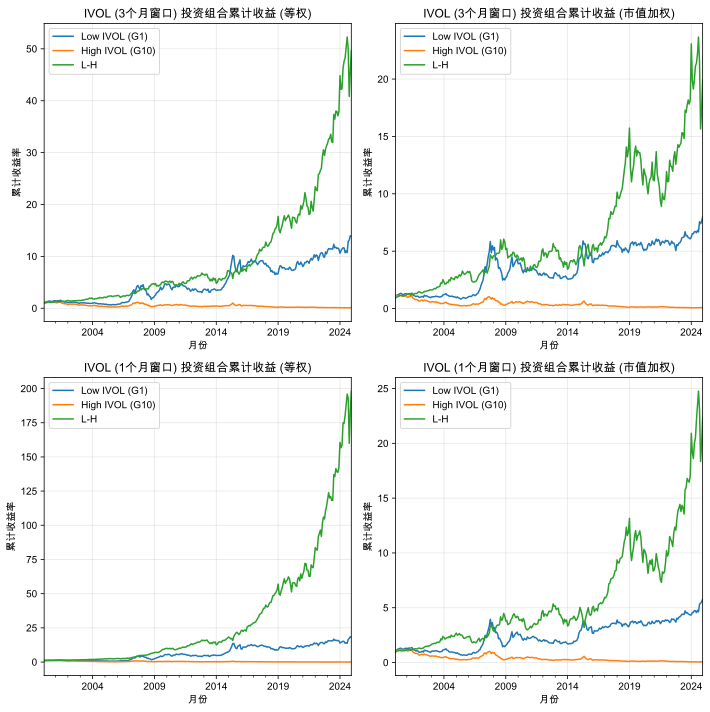

In [21]:
# 绘制累计收益率图 (等权和市值加权)
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# IVOL 3个月窗口 等权累计收益率
cum_ret_ivol3m_ew = (1 + portfolio_ivol3m_ew[['G1', 'G10', 'L-H']]).cumprod()
cum_ret_ivol3m_ew.plot(ax=axes[0, 0], linewidth=1.5)
axes[0, 0].set_title('IVOL (3个月窗口) 投资组合累计收益 (等权)', fontsize=12)
axes[0, 0].set_xlabel('月份')
axes[0, 0].set_ylabel('累计收益率')
axes[0, 0].legend(['Low IVOL (G1)', 'High IVOL (G10)', 'L-H'], loc='upper left')
axes[0, 0].grid(True, alpha=0.3)

# IVOL 3个月窗口 市值加权累计收益率
cum_ret_ivol3m_vw = (1 + portfolio_ivol3m_vw[['G1', 'G10', 'L-H']]).cumprod()
cum_ret_ivol3m_vw.plot(ax=axes[0, 1], linewidth=1.5)
axes[0, 1].set_title('IVOL (3个月窗口) 投资组合累计收益 (市值加权)', fontsize=12)
axes[0, 1].set_xlabel('月份')
axes[0, 1].set_ylabel('累计收益率')
axes[0, 1].legend(['Low IVOL (G1)', 'High IVOL (G10)', 'L-H'], loc='upper left')
axes[0, 1].grid(True, alpha=0.3)

# IVOL 1个月窗口 等权累计收益率
cum_ret_ivol1m_ew = (1 + portfolio_ivol1m_ew[['G1', 'G10', 'L-H']]).cumprod()
cum_ret_ivol1m_ew.plot(ax=axes[1, 0], linewidth=1.5)
axes[1, 0].set_title('IVOL (1个月窗口) 投资组合累计收益 (等权)', fontsize=12)
axes[1, 0].set_xlabel('月份')
axes[1, 0].set_ylabel('累计收益率')
axes[1, 0].legend(['Low IVOL (G1)', 'High IVOL (G10)', 'L-H'], loc='upper left')
axes[1, 0].grid(True, alpha=0.3)

# IVOL 1个月窗口 市值加权累计收益率
cum_ret_ivol1m_vw = (1 + portfolio_ivol1m_vw[['G1', 'G10', 'L-H']]).cumprod()
cum_ret_ivol1m_vw.plot(ax=axes[1, 1], linewidth=1.5)
axes[1, 1].set_title('IVOL (1个月窗口) 投资组合累计收益 (市值加权)', fontsize=12)
axes[1, 1].set_xlabel('月份')
axes[1, 1].set_ylabel('累计收益率')
axes[1, 1].legend(['Low IVOL (G1)', 'High IVOL (G10)', 'L-H'], loc='upper left')
axes[1, 1].grid(True, alpha=0.3)

print("\nIVOL (3个月窗口) 各组合累计收益率 (等权):")
print(cum_ret_ivol3m_ew.iloc[-1])
print("\nIVOL (3个月窗口) 各组合累计收益率 (市值加权):")
print(cum_ret_ivol3m_vw.iloc[-1])
print("\nIVOL (1个月窗口) 各组合累计收益率 (等权):")
print(cum_ret_ivol1m_ew.iloc[-1])
print("\nIVOL (1个月窗口) 各组合累计收益率 (市值加权):")
print(cum_ret_ivol1m_vw.iloc[-1])

plt.tight_layout();
plt.show();

### Fama-French 三因子回归分析

In [28]:
ff3_monthly = pd.read_csv('/Users/liuwanting/Desktop/pythonhomework/factors_3f.csv')
ff3_monthly['month'] = pd.to_datetime(ff3_monthly['month'])
ff3_monthly.set_index('month', inplace=True)
print("Fama-French三因子数据:")
ff3_monthly.head()

Fama-French三因子数据:


,MKT,SMB,HML
month,,,
2000-01-31,0.158982,-0.014495,-0.060382
2000-02-29,0.120168,0.026202,-0.059298
2000-03-31,0.054070,0.082763,0.003747
2000-04-30,0.011158,-0.000101,0.014456
2000-05-31,0.025835,0.023746,0.017182


In [29]:
portfolio_ivol3m_ew_ff3 = portfolio_ivol3m_ew.merge(ff3_monthly, left_index=True, right_index=True, how='inner')
portfolio_ivol3m_vw_ff3 = portfolio_ivol3m_vw.merge(ff3_monthly, left_index=True, right_index=True, how='inner')

def ff3_regression(portfolio_returns, ff3_data):
    results = []

    for col in ['G1', 'G10', 'L-H']:
        if col in portfolio_returns.columns:
            reg_data = pd.DataFrame({
                'ret': portfolio_returns[col],
                'MKT': ff3_data['MKT'],
                'SMB': ff3_data['SMB'],
                'HML': ff3_data['HML']
            }).dropna()
            model = smf.ols('ret ~ MKT + SMB + HML', data=reg_data).fit(cov_type='HAC', cov_kwds={'maxlags': 6})

            results.append({
                '组合': col,
                'Alpha': model.params['Intercept'] * 100,
                't(Alpha)': model.tvalues['Intercept'],
                'Beta(MKT)': model.params['MKT'],
                't(MKT)': model.tvalues['MKT'],
                'Beta(SMB)': model.params['SMB'],
                't(SMB)': model.tvalues['SMB'],
                'Beta(HML)': model.params['HML'],
                't(HML)': model.tvalues['HML'],
                'R²': model.rsquared
            })

    return pd.DataFrame(results).set_index('组合')

print("="*80)
print("IVOL (3个月窗口) 投资组合 - Fama-French 三因子回归 (等权)")
print("="*80)
ff3_reg_ivol3m_ew = ff3_regression(portfolio_ivol3m_ew_ff3, portfolio_ivol3m_ew_ff3)
ff3_reg_ivol3m_ew

IVOL (3个月窗口) 投资组合 - Fama-French 三因子回归 (等权)


,Alpha,t(Alpha),Beta(MKT),t(MKT),Beta(SMB),t(SMB),Beta(HML),t(HML),R²
组合,,,,,,,,,
G1,0.116088,0.993615,0.938477,35.966523,0.535081,10.216105,0.173205,3.429768,0.939230
G10,-0.408226,-2.331868,1.009135,44.986293,0.398986,5.381783,-0.803240,-10.372284,0.917946
L-H,0.524314,2.369242,-0.070658,-1.687932,0.136095,1.267613,0.976445,9.384390,0.457856


In [30]:
print("="*80)
print("IVOL (3个月窗口) 投资组合 - Fama-French 三因子回归 (市值加权)")
print("="*80)
ff3_reg_ivol3m_vw = ff3_regression(portfolio_ivol3m_vw_ff3, portfolio_ivol3m_vw_ff3)
ff3_reg_ivol3m_vw

IVOL (3个月窗口) 投资组合 - Fama-French 三因子回归 (市值加权)


,Alpha,t(Alpha),Beta(MKT),t(MKT),Beta(SMB),t(SMB),Beta(HML),t(HML),R²
组合,,,,,,,,,
G1,0.028012,0.172371,0.850021,31.061474,-0.149636,-2.207647,0.483248,8.197768,0.876117
G10,0.033244,0.142639,0.982018,26.395321,-0.155597,-1.753173,-1.001326,-9.739186,0.860195
L-H,-0.005232,-0.019205,-0.131997,-3.131281,0.005962,0.054620,1.484574,13.627220,0.642210


In [31]:
portfolio_ivol1m_ew_ff3 = portfolio_ivol1m_ew.merge(ff3_monthly, left_index=True, right_index=True, how='inner')
portfolio_ivol1m_vw_ff3 = portfolio_ivol1m_vw.merge(ff3_monthly, left_index=True, right_index=True, how='inner')

In [32]:
print("="*80)
print("IVOL (1个月窗口) 投资组合 - Fama-French 三因子回归 (市值加权)")
print("="*80)
ff3_reg_ivol1m_vw = ff3_regression(portfolio_ivol1m_vw_ff3, portfolio_ivol1m_vw_ff3)
ff3_reg_ivol1m_vw

IVOL (1个月窗口) 投资组合 - Fama-French 三因子回归 (市值加权)


,Alpha,t(Alpha),Beta(MKT),t(MKT),Beta(SMB),t(SMB),Beta(HML),t(HML),R²
组合,,,,,,,,,
G1,-0.049991,-0.266967,0.829632,39.164025,-0.064499,-0.834720,0.403736,6.064693,0.840183
G10,-0.183689,-0.888285,0.976337,24.168651,-0.162756,-1.885820,-0.866030,-8.654991,0.866511
L-H,0.133697,0.434469,-0.146705,-3.046735,0.098258,0.732697,1.269766,11.400964,0.550135


In [33]:
print("="*80)
print("IVOL (1个月窗口) 投资组合 - Fama-French 三因子回归 (等权)")
print("="*80)
ff3_reg_ivol1m_ew = ff3_regression(portfolio_ivol1m_ew_ff3, portfolio_ivol1m_ew_ff3)
ff3_reg_ivol1m_ew

IVOL (1个月窗口) 投资组合 - Fama-French 三因子回归 (等权)


,Alpha,t(Alpha),Beta(MKT),t(MKT),Beta(SMB),t(SMB),Beta(HML),t(HML),R²
组合,,,,,,,,,
G1,0.224461,1.840462,0.933448,46.279137,0.604394,13.683283,0.122638,2.765247,0.948177
G10,-0.765040,-4.329711,0.969882,37.403696,0.390470,5.895188,-0.743522,-9.738157,0.923660
L-H,0.989501,4.145033,-0.036433,-0.877688,0.213924,2.340239,0.866160,9.260324,0.416063


## 深入分析

### 1. 时间序列稳定性分析

In [34]:
mid_date = portfolio_ivol3m_ew.index[len(portfolio_ivol3m_ew) // 2]

portfolio_ivol3m_ew_first = portfolio_ivol3m_ew[portfolio_ivol3m_ew.index < mid_date]
portfolio_ivol3m_vw_first = portfolio_ivol3m_vw[portfolio_ivol3m_vw.index < mid_date]

portfolio_ivol3m_ew_second = portfolio_ivol3m_ew[portfolio_ivol3m_ew.index >= mid_date]
portfolio_ivol3m_vw_second = portfolio_ivol3m_vw[portfolio_ivol3m_vw.index >= mid_date]

def calc_period_stats(portfolio_ew, portfolio_vw, period_name):
    print(f"\n{'='*80}")
    print(f"{period_name} ({portfolio_ew.index[0].strftime('%Y-%m')} 至 {portfolio_ew.index[-1].strftime('%Y-%m')})")
    print(f"{'='*80}")

    stats_ew = pd.DataFrame({
        '平均收益率': portfolio_ew.mean() * 100,
        '标准差': portfolio_ew.std() * 100,
        't值(NW)': portfolio_ew.apply(calc_newey_west_tvalue),
        '夏普比率': portfolio_ew.mean() / portfolio_ew.std() * np.sqrt(12)
    })

    stats_vw = pd.DataFrame({
        '平均收益率': portfolio_vw.mean() * 100,
        '标准差': portfolio_vw.std() * 100,
        't值(NW)': portfolio_vw.apply(calc_newey_west_tvalue),
        '夏普比率': portfolio_vw.mean() / portfolio_vw.std() * np.sqrt(12)
    })

    print("\n【等权加权】:")
    print(stats_ew[['平均收益率', 't值(NW)', '夏普比率']])
    print("\n【市值加权】:")
    print(stats_vw[['平均收益率', 't值(NW)', '夏普比率']])

    return stats_ew, stats_vw

stats_first_ew, stats_first_vw = calc_period_stats(
    portfolio_ivol3m_ew_first, portfolio_ivol3m_vw_first, "前半期"
)

stats_second_ew, stats_second_vw = calc_period_stats(
    portfolio_ivol3m_ew_second, portfolio_ivol3m_vw_second, "后半期"
)


前半期 (2000-02 至 2012-06)

【等权加权】:
        平均收益率    t值(NW)      夏普比率
G1   1.228900  1.191484  0.473068
G2   1.424353  1.319282  0.517144
G3   1.206834  1.149335  0.436944
G4   1.269402  1.193303  0.462268
G5   1.101940  1.020363  0.384552
G6   1.019337  0.966298  0.364576
G7   0.868103  0.824663  0.308799
G8   0.560437  0.535472  0.194574
G9   0.401152  0.382034  0.138682
G10 -0.085469 -0.081315 -0.028164
L-H  1.314370  4.696993  1.025639

【市值加权】:
        平均收益率    t值(NW)      夏普比率
G1   0.992352  1.091886  0.448203
G2   0.960588  0.947802  0.370863
G3   0.784059  0.814196  0.307131
G4   1.223764  1.186151  0.449284
G5   0.895262  0.915922  0.330551
G6   0.650583  0.638652  0.250708
G7   0.648801  0.611959  0.236222
G8   0.299239  0.290153  0.108485
G9   0.390954  0.356662  0.136108
G10 -0.268169 -0.269507 -0.093118
L-H  1.260522  2.574976  0.655212

后半期 (2012-07 至 2024-12)

【等权加权】:
        平均收益率    t值(NW)      夏普比率
G1   1.135027  2.121847  0.605313
G2   1.227137  2.316189  0.596757
G3   


## 2. 双重排序分析

### 2.1 IVOL × 市值（条件排序）

In [35]:
cross_ivol['size_group'] = cross_ivol.groupby('month')['totalvalue'].transform(
    lambda x: pd.qcut(x, 3, labels=['Small', 'Medium', 'Large'], duplicates='drop')
)

cross_ivol['ivol_group_in_size'] = cross_ivol.groupby(['month', 'size_group'], observed=True)['IVOL_3m'].transform(
    lambda x: pd.qcut(x, 5, labels=False, duplicates='drop') + 1
)

double_sort_ew = cross_ivol.groupby(['month', 'size_group', 'ivol_group_in_size'], observed=True)['next_ret'].mean().unstack(level=[1, 2])

double_sort_vw = cross_ivol.groupby(['month', 'size_group', 'ivol_group_in_size'], observed=True, group_keys=False)[['next_ret', 'totalvalue']].apply(weighted_avg).unstack(level=[1, 2])

results_double_sort_ew = []
for size in ['Small', 'Medium', 'Large']:
    if (size, 1.0) in double_sort_ew.columns and (size, 5.0) in double_sort_ew.columns:
        hl_ret = double_sort_ew[(size, 1.0)] - double_sort_ew[(size, 5.0)]
        avg_ret = hl_ret.mean() * 100
        t_val = calc_newey_west_tvalue(hl_ret)
        sharpe = hl_ret.mean() / hl_ret.std() * np.sqrt(12)

        results_double_sort_ew.append({
            '市值组': size,
            'L-H平均收益率(%)': avg_ret,
            't值(NW)': t_val,
            '夏普比率': sharpe
        })

double_sort_summary_ew = pd.DataFrame(results_double_sort_ew)

results_double_sort_vw = []
for size in ['Small', 'Medium', 'Large']:
    if (size, 1.0) in double_sort_vw.columns and (size, 5.0) in double_sort_vw.columns:
        hl_ret = double_sort_vw[(size, 1.0)] - double_sort_vw[(size, 5.0)]
        avg_ret = hl_ret.mean() * 100
        t_val = calc_newey_west_tvalue(hl_ret)
        sharpe = hl_ret.mean() / hl_ret.std() * np.sqrt(12)

        results_double_sort_vw.append({
            '市值组': size,
            'L-H平均收益率(%)': avg_ret,
            't值(NW)': t_val,
            '夏普比率': sharpe
        })

double_sort_summary_vw = pd.DataFrame(results_double_sort_vw)

print("="*80)
print("双重排序（条件排序）：IVOL × 市值")
print("="*80)
print("\n【等权】各市值组内IVOL H-L组合表现：")
double_sort_summary_ew

双重排序（条件排序）：IVOL × 市值

【等权】各市值组内IVOL H-L组合表现：


,市值组,L-H平均收益率(%),t值(NW),夏普比率
0,Small,1.589193,9.586464,1.396712
1,Medium,1.301576,6.554826,1.023308
2,Large,0.871340,3.199368,0.580401


In [36]:
print("\n【市值加权】各市值组内IVOL H-L组合表现：")
double_sort_summary_vw


【市值加权】各市值组内IVOL H-L组合表现：


,市值组,L-H平均收益率(%),t值(NW),夏普比率
0,Small,1.589103,9.552693,1.381383
1,Medium,1.261740,6.257113,0.979011
2,Large,0.752910,2.313151,0.414753


### 2.2 IVOL × 市值（独立排序）

In [37]:
cross_ivol['ivol_group_independent'] = cross_ivol.groupby('month')['IVOL_3m'].transform(
    lambda x: pd.qcut(x, 5, labels=False, duplicates='drop') + 1
)

independent_sort_ew = cross_ivol.groupby(['month', 'size_group', 'ivol_group_independent'], observed=True)['next_ret'].mean().unstack(level=[1, 2])

independent_sort_vw = cross_ivol.groupby(['month', 'size_group', 'ivol_group_independent'], observed=True, group_keys=False)[['next_ret', 'totalvalue']].apply(weighted_avg).unstack(level=[1, 2])

results_independent_ew = []
for size in ['Small', 'Medium', 'Large']:
    if (size, 1.0) in independent_sort_ew.columns and (size, 5.0) in independent_sort_ew.columns:
        hl_ret = independent_sort_ew[(size, 1.0)] - independent_sort_ew[(size, 5.0)]
        avg_ret = hl_ret.mean() * 100
        t_val = calc_newey_west_tvalue(hl_ret)
        sharpe = hl_ret.mean() / hl_ret.std() * np.sqrt(12)

        results_independent_ew.append({
            '市值组': size,
            'L-H平均收益率(%)': avg_ret,
            't值(NW)': t_val,
            '夏普比率': sharpe
        })

independent_summary_ew = pd.DataFrame(results_independent_ew)

results_independent_vw = []
for size in ['Small', 'Medium', 'Large']:
    if (size, 1.0) in independent_sort_vw.columns and (size, 5.0) in independent_sort_vw.columns:
        hl_ret = independent_sort_vw[(size, 1.0)] - independent_sort_vw[(size, 5.0)]
        avg_ret = hl_ret.mean() * 100
        t_val = calc_newey_west_tvalue(hl_ret)
        sharpe = hl_ret.mean() / hl_ret.std() * np.sqrt(12)

        results_independent_vw.append({
            '市值组': size,
            'L-H平均收益率(%)': avg_ret,
            't值(NW)': t_val,
            '夏普比率': sharpe
        })

independent_summary_vw = pd.DataFrame(results_independent_vw)

print("="*80)
print("双重排序（独立排序）：IVOL × 市值")
print("="*80)
print("\n【等权】各市值组内IVOL H-L组合表现：")
independent_summary_ew

双重排序（独立排序）：IVOL × 市值

【等权】各市值组内IVOL H-L组合表现：


,市值组,L-H平均收益率(%),t值(NW),夏普比率
0,Small,1.521828,9.516186,1.352702
1,Medium,1.244713,6.164234,0.979038
2,Large,0.918273,3.302880,0.596218


In [38]:
print("\n【市值加权】各市值组内IVOL H-L组合表现：")
independent_summary_vw


【市值加权】各市值组内IVOL H-L组合表现：


,市值组,L-H平均收益率(%),t值(NW),夏普比率
0,Small,1.523565,9.456825,1.337460
1,Medium,1.199734,5.803052,0.929560
2,Large,0.812734,2.459173,0.431093


### 2.3 IVOL × EP（条件排序）

In [26]:
cross_ivol['ep_group'] = cross_ivol.groupby('month')['ep'].transform(
    lambda x: pd.qcut(x, 3, labels=['Low', 'Medium', 'High'], duplicates='drop')
)

cross_ivol['ivol_group_in_ep'] = cross_ivol.groupby(['month', 'ep_group'], observed=True)['IVOL_3m'].transform(
    lambda x: pd.qcut(x, 5, labels=False, duplicates='drop') + 1
)

double_sort_ep_ew = cross_ivol.groupby(['month', 'ep_group', 'ivol_group_in_ep'], observed=True)['next_ret'].mean().unstack(level=[1, 2])

double_sort_ep_vw = cross_ivol.groupby(['month', 'ep_group', 'ivol_group_in_ep'], observed=True, group_keys=False)[['next_ret', 'totalvalue']].apply(weighted_avg).unstack(level=[1, 2])

results_double_sort_ep_ew = []
for ep_cat in ['Low', 'Medium', 'High']:
    if (ep_cat, 1.0) in double_sort_ep_ew.columns and (ep_cat, 5.0) in double_sort_ep_ew.columns:
        hl_ret = double_sort_ep_ew[(ep_cat, 1.0)] - double_sort_ep_ew[(ep_cat, 5.0)]
        avg_ret = hl_ret.mean() * 100
        t_val = calc_newey_west_tvalue(hl_ret)
        sharpe = hl_ret.mean() / hl_ret.std() * np.sqrt(12)

        results_double_sort_ep_ew.append({
            'EP组': ep_cat,
            'L-H平均收益率(%)': avg_ret,
            't值(NW)': t_val,
            '夏普比率': sharpe
        })

double_sort_ep_summary_ew = pd.DataFrame(results_double_sort_ep_ew)

results_double_sort_ep_vw = []
for ep_cat in ['Low', 'Medium', 'High']:
    if (ep_cat, 1.0) in double_sort_ep_vw.columns and (ep_cat, 5.0) in double_sort_ep_vw.columns:
        hl_ret = double_sort_ep_vw[(ep_cat, 1.0)] - double_sort_ep_vw[(ep_cat, 5.0)]
        avg_ret = hl_ret.mean() * 100
        t_val = calc_newey_west_tvalue(hl_ret)
        sharpe = hl_ret.mean() / hl_ret.std() * np.sqrt(12)

        results_double_sort_ep_vw.append({
            'EP组': ep_cat,
            'L-H平均收益率(%)': avg_ret,
            't值(NW)': t_val,
            '夏普比率': sharpe
        })

double_sort_ep_summary_vw = pd.DataFrame(results_double_sort_ep_vw)

print("="*80)
print("双重排序（条件排序）：IVOL × EP")
print("="*80)
print("\n【等权】各EP组内IVOL H-L组合表现：")
print(double_sort_ep_summary_ew)
print("\n【市值加权】各EP组内IVOL H-L组合表现：")
double_sort_ep_summary_vw

双重排序（条件排序）：IVOL × EP

【等权】各EP组内IVOL H-L组合表现：
      EP组  L-H平均收益率(%)    t值(NW)      夏普比率
0     Low     1.710875  7.891462  1.211544
1  Medium     0.890731  4.580123  0.762751
2    High     0.476828  2.882627  0.473425

【市值加权】各EP组内IVOL H-L组合表现：


,EP组,L-H平均收益率(%),t值(NW),夏普比率
0,Low,1.572132,4.952118,0.894746
1,Medium,0.653294,2.234845,0.399620
2,High,0.404082,1.509598,0.266163



## 3. 收益分解分析

In [25]:
long_ret_ew = portfolio_ivol3m_ew['G1'].mean() * 100
short_ret_ew = portfolio_ivol3m_ew['G10'].mean() * 100
hl_ret_ew = portfolio_ivol3m_ew['L-H'].mean() * 100

long_t_ew = calc_newey_west_tvalue(portfolio_ivol3m_ew['G1'])
short_t_ew = calc_newey_west_tvalue(portfolio_ivol3m_ew['G10'])

long_ret_vw = portfolio_ivol3m_vw['G1'].mean() * 100
short_ret_vw = portfolio_ivol3m_vw['G10'].mean() * 100
hl_ret_vw = portfolio_ivol3m_vw['L-H'].mean() * 100

long_t_vw = calc_newey_west_tvalue(portfolio_ivol3m_vw['G1'])
short_t_vw = calc_newey_west_tvalue(portfolio_ivol3m_vw['G10'])

long_contrib_ew = (long_ret_ew / hl_ret_ew) * 100 if hl_ret_ew != 0 else 0
short_contrib_ew = (-short_ret_ew / hl_ret_ew) * 100 if hl_ret_ew != 0 else 0

long_contrib_vw = (long_ret_vw / hl_ret_vw) * 100 if hl_ret_vw != 0 else 0
short_contrib_vw = (-short_ret_vw / hl_ret_vw) * 100 if hl_ret_vw != 0 else 0

decomposition_results = pd.DataFrame({
    '组合类型': ['等权', '市值加权'],
    '多头收益率(%)': [long_ret_ew, long_ret_vw],
    '多头t值': [long_t_ew, long_t_vw],
    '空头收益率(%)': [short_ret_ew, short_ret_vw],
    '空头t值': [short_t_ew, short_t_vw],
    'H-L收益率(%)': [hl_ret_ew, hl_ret_vw],
    '多头贡献(%)': [long_contrib_ew, long_contrib_vw],
    '空头贡献(%)': [short_contrib_ew, short_contrib_vw]
})

print("="*80)
print("H-L组合收益分解")
print("="*80)
print("\n多头(G1, Low IVOL)和空头(G10, High IVOL)的收益贡献：")
decomposition_results

H-L组合收益分解

多头(G1, Low IVOL)和空头(G10, High IVOL)的收益贡献：


,组合类型,多头收益率(%),多头t值,空头收益率(%),空头t值,H-L收益率(%),多头贡献(%),空头贡献(%)
0,等权,1.181807,2.034204,-0.280145,-0.449699,1.461951,80.837627,19.162373
1,市值加权,0.907947,1.779834,-0.384059,-0.650114,1.292006,70.274212,29.725788



## 4. 市场状态分析

In [24]:
portfolio_ivol_with_mkt = portfolio_ivol3m_ew.merge(Market_ret[['MKT']], left_index=True, right_index=True, how='inner')

portfolio_ivol_with_mkt['market_state'] = portfolio_ivol_with_mkt['MKT'].apply(
    lambda x: 'Up Market' if x > 0 else 'Down Market'
)

def calc_market_state_stats(df, state_label):
    subset = df[df['market_state'] == state_label]
    if len(subset) > 0:
        hl_ret = subset['L-H']
        return {
            '市场状态': state_label,
            '月数': len(subset),
            'H-L平均收益率(%)': hl_ret.mean() * 100,
            't值(NW)': calc_newey_west_tvalue(hl_ret),
            '夏普比率': hl_ret.mean() / hl_ret.std() * np.sqrt(12) if hl_ret.std() > 0 else np.nan
        }
    return None

up_market_stats = calc_market_state_stats(portfolio_ivol_with_mkt, 'Up Market')
down_market_stats = calc_market_state_stats(portfolio_ivol_with_mkt, 'Down Market')

market_state_results = pd.DataFrame([up_market_stats, down_market_stats])

print("="*80)
print("市场状态分析：IVOL L-H组合在牛市和熊市的表现")
print("="*80)
market_state_results

市场状态分析：IVOL L-H组合在牛市和熊市的表现


,市场状态,月数,H-L平均收益率(%),t值(NW),夏普比率
0,Up Market,160,0.430405,0.932817,0.272217
1,Down Market,139,2.649342,8.131701,1.758429



## 5. IVOL的持续性分析

In [23]:
cross_ivol_sorted = cross_ivol.sort_values(['Stkcd', 'month']).copy()
temp_df = cross_ivol_sorted[['Stkcd', 'month', 'IVOL_3m']].copy()

for lag in range(1, 13):
    lag_data = temp_df.copy()
    lag_data['month'] = lag_data['month'] + MonthEnd(lag)
    lag_data = lag_data.rename(columns={'IVOL_3m': f'IVOL_3m_lag{lag}'})

    cross_ivol_sorted = pd.merge(cross_ivol_sorted, lag_data, on=['Stkcd', 'month'], how='left')

correlations = []
for lag in range(1, 13):
    valid_data = cross_ivol_sorted[['IVOL_3m', f'IVOL_3m_lag{lag}']].dropna()
    if len(valid_data) > 0:
        corr = valid_data.corr().iloc[0, 1]
    else:
        corr = np.nan

    correlations.append({
        '滞后期': f'{lag}个月',
        '相关系数': corr
    })

persistence_df = pd.DataFrame(correlations)

print("="*80)
print("IVOL的持续性分析")
print("="*80)
print("\nIVOL的自相关系数：")
persistence_df

IVOL的持续性分析

IVOL的自相关系数：


,滞后期,相关系数
0,1个月,0.876659
1,2个月,0.700144
2,3个月,0.525213
3,4个月,0.459444
4,5个月,0.418720
5,6个月,0.387491
6,7个月,0.361440
7,8个月,0.338087
8,9个月,0.321097
9,10个月,0.306167



## 6. 风险指标分析

In [39]:
def calculate_risk_metrics(returns):
    cum_returns = (1 + returns).cumprod()
    running_max = cum_returns.expanding().max()
    drawdown = (cum_returns - running_max) / running_max
    max_drawdown = drawdown.min()
    info_ratio = returns.mean() / returns.std() * np.sqrt(12)
    skewness = returns.skew()
    kurtosis = returns.kurtosis()
    downside_returns = returns[returns < 0]
    downside_std = downside_returns.std() if len(downside_returns) > 0 else 0
    sortino_ratio = returns.mean() / downside_std * np.sqrt(12) if downside_std > 0 else np.nan

    return {
        '平均收益率(%)': returns.mean() * 100,
        '标准差(%)': returns.std() * 100,
        '最大回撤(%)': max_drawdown * 100,
        '夏普比率': info_ratio,
        'Sortino比率': sortino_ratio,
        '偏度': skewness,
        '峰度': kurtosis
    }

# 计算等权组合的风险指标
risk_metrics_ew = []
for col in ['G1', 'G10', 'L-H']:
    metrics = calculate_risk_metrics(portfolio_ivol3m_ew[col])
    metrics['组合'] = col
    risk_metrics_ew.append(metrics)

risk_metrics_ew_df = pd.DataFrame(risk_metrics_ew).set_index('组合')

# 计算市值加权组合的风险指标
risk_metrics_vw = []
for col in ['G1', 'G10', 'L-H']:
    metrics = calculate_risk_metrics(portfolio_ivol3m_vw[col])
    metrics['组合'] = col
    risk_metrics_vw.append(metrics)

risk_metrics_vw_df = pd.DataFrame(risk_metrics_vw).set_index('组合')

print("="*80)
print("风险调整后的表现分析")
print("="*80)
print("\n【等权组合】风险指标：")
print(risk_metrics_ew_df)
print("\n【市值加权组合】风险指标：")
risk_metrics_vw_df

风险调整后的表现分析

【等权组合】风险指标：
     平均收益率(%)     标准差(%)    最大回撤(%)      夏普比率  Sortino比率        偏度        峰度
组合                                                                          
G1   1.181807   7.830428 -62.547147  0.522819   0.883166  0.474435  2.426935
G10 -0.280145  10.174948 -94.089618 -0.095376  -0.155516  0.223421  1.120472
L-H  1.461951   5.463482 -29.054931  0.926945   1.455645 -0.029930  1.266816

【市值加权组合】风险指标：


,平均收益率(%),标准差(%),最大回撤(%),夏普比率,Sortino比率,偏度,峰度
组合,,,,,,,
G1,0.907947,6.530238,-57.470466,0.481640,0.780297,0.223510,1.781793
G10,-0.384059,9.801514,-95.002044,-0.135736,-0.220667,0.212161,0.995024
L-H,1.292006,7.597812,-45.071432,0.589070,0.907629,0.025424,1.274356



## 7. 相关性分析

In [41]:
rolling_betas = pd.read_csv('/Users/liuwanting/Desktop/pythonhomework/rolling_betas.csv')
rolling_betas['Stkcd'] = rolling_betas['Stkcd'].apply(lambda x: '{:0>6}'.format(x))
rolling_betas['month'] = pd.to_datetime(rolling_betas['month']) + MonthEnd(0)

cross_ivol_corr = pd.merge(cross_ivol, rolling_betas[['Stkcd', 'month', 'beta']],
                           on=['Stkcd', 'month'], how='left')

cross_ivol_corr = cross_ivol_corr[cross_ivol_corr['month'] >= '2000-01-31']

cross_ivol_corr['size'] = np.log(cross_ivol_corr['totalvalue'])
cross_ivol_corr['value'] = cross_ivol_corr['ep']

print(f"合并beta后样本量: {len(cross_ivol_corr)}")
print(f"beta非缺失样本量: {cross_ivol_corr['beta'].notna().sum()}")
cross_ivol_corr[['Stkcd', 'month', 'IVOL_3m', 'beta', 'size', 'value']].head(10)

合并beta后样本量: 475504
beta非缺失样本量: 408272


,Stkcd,month,IVOL_3m,beta,size,value
0,000001,2000-01-31,0.010570,1.200583,24.082103,0.026577
1,000001,2000-02-29,0.011450,1.204760,24.070705,0.026882
2,000001,2000-03-31,0.017245,1.202779,24.073431,0.026809
3,000001,2000-04-30,0.017462,1.224677,24.109779,0.018780
4,000001,2000-05-31,0.015476,1.228584,24.053083,0.019876
5,000001,2000-06-30,0.009565,1.275904,24.060280,0.019733
6,000001,2000-07-31,0.013238,1.281767,24.081023,0.019328
7,000001,2000-08-31,0.012001,1.289464,24.039097,0.020156
8,000001,2000-09-30,0.012041,1.289479,23.993569,0.021094
9,000001,2000-10-31,0.009255,1.290003,24.027766,0.020385


In [42]:
def calc_monthly_correlation_matrix(df):
    variables = ['IVOL_3m', 'beta', 'size', 'value', 'next_ret']
    var_names = ['特质波动率', 'Beta', 'Size (log)', 'Value (EP)', '未来收益率']

    monthly_corr_matrices = []
    valid_months = []

    available_vars = [v for v in variables if v in df.columns]
    if len(available_vars) < len(variables):
        missing = set(variables) - set(available_vars)
        print(f"警告: 缺少变量 {missing}")
        return None, None, None

    for month in sorted(df['month'].unique()):
        month_data = df[df['month'] == month][variables].dropna()

        if len(month_data) > 10:
            corr_matrix = month_data.corr()
            monthly_corr_matrices.append(corr_matrix)
            valid_months.append(month)

    return monthly_corr_matrices, valid_months, var_names

# 计算每月的相关系数矩阵
monthly_corr_matrices, valid_months, var_names = calc_monthly_correlation_matrix(cross_ivol_corr)

if monthly_corr_matrices and len(monthly_corr_matrices) > 0:
    avg_corr_matrix = pd.concat(monthly_corr_matrices).groupby(level=0).mean()

    variables = ['IVOL_3m', 'beta', 'size', 'value', 'next_ret']
    avg_corr_matrix = avg_corr_matrix.reindex(index=variables, columns=variables)

    avg_corr_matrix.index = var_names
    avg_corr_matrix.columns = var_names

    print("="*80)
    print("指标间相关系数矩阵（截面相关系数的时序平均）")
    print("="*80)
    print(f"\n样本期间: {pd.to_datetime(valid_months[0]).strftime('%Y-%m')} 至 {pd.to_datetime(valid_months[-1]).strftime('%Y-%m')}")
    print(f"有效月份数: {len(valid_months)}")
    print(f"每月平均观测数: {cross_ivol_corr.groupby('month').size().mean():.0f}")
    print("\n时序平均相关系数矩阵:")
    avg_corr_matrix
else:
    print("无法计算相关系数矩阵，请检查数据。")

指标间相关系数矩阵（截面相关系数的时序平均）

样本期间: 2000-01 至 2024-11
有效月份数: 299
每月平均观测数: 1590

时序平均相关系数矩阵:


,特质波动率,Beta,Size (log),Value (EP),未来收益率
特质波动率,1.000000,0.117498,-0.122528,-0.214497,-0.052682
Beta,0.117498,1.000000,-0.094693,-0.108856,-0.015511
Size (log),-0.122528,-0.094693,1.000000,0.268535,-0.010264
Value (EP),-0.214497,-0.108856,0.268535,1.000000,0.026779
未来收益率,-0.052682,-0.015511,-0.010264,0.026779,1.000000


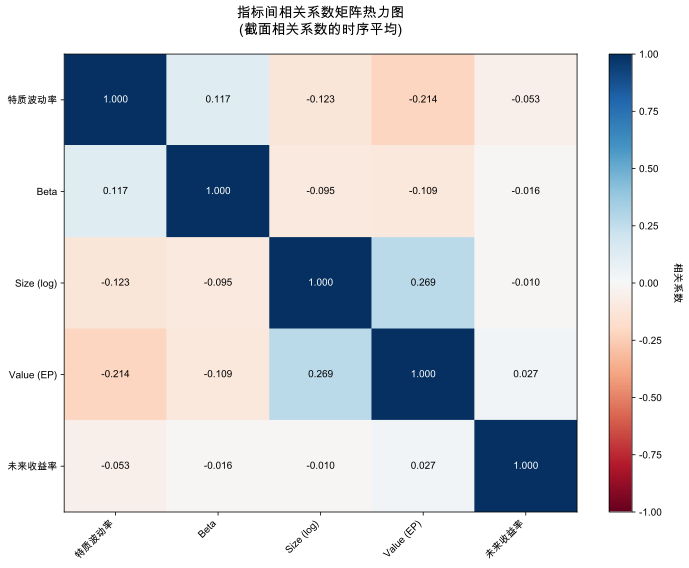

In [43]:
fig, ax = plt.subplots(figsize=(10, 8))

im = ax.imshow(
    avg_corr_matrix,
    cmap='RdBu',
    aspect='auto',
    vmin=-1,
    vmax=1
)

ax.set_xticks(np.arange(len(var_names)))
ax.set_yticks(np.arange(len(var_names)))
ax.set_xticklabels(var_names, rotation=45, ha='right')
ax.set_yticklabels(var_names)

for i in range(len(var_names)):
    for j in range(len(var_names)):
        text = ax.text(
            j, i,
            f'{avg_corr_matrix.iloc[i, j]:.3f}',
            ha="center",
            va="center",
            color="black" if abs(avg_corr_matrix.iloc[i, j]) < 0.5 else "white",
            fontsize=10,
            fontweight='bold'
        )

cbar = plt.colorbar(im, ax=ax)
cbar.set_label('相关系数', rotation=270, labelpad=20)

ax.set_title('指标间相关系数矩阵热力图\n(截面相关系数的时序平均)', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show();

In [44]:
print("="*80)
print("相关系数的统计显著性检验")
print("="*80)
print("\nH0: 时序平均相关系数 = 0\n")

ivol_correlations = pd.DataFrame()
for i, var_name in enumerate(var_names):
    if var_name != '特质波动率':
        time_series = [matrix.iloc[0, i] for matrix in monthly_corr_matrices]
        ivol_correlations[var_name] = time_series

significance_results = []
for col in ivol_correlations.columns:
    series = ivol_correlations[col]
    mean_corr = series.mean()
    std_corr = series.std()
    n = len(series)
    t_stat = mean_corr / (std_corr / np.sqrt(n))
    p_value = 2 * (1 - stats.t.cdf(abs(t_stat), n - 1))

    significance_results.append({
        '变量': col,
        '平均相关系数': mean_corr,
        '标准差': std_corr,
        't统计量': t_stat,
        'p值': p_value,
        '显著性': '***' if p_value < 0.01 else '**' if p_value < 0.05 else '*' if p_value < 0.1 else ''
    })

significance_df = pd.DataFrame(significance_results)
significance_df

print("\n注: *** p<0.01, ** p<0.05, * p<0.1")

相关系数的统计显著性检验

H0: 时序平均相关系数 = 0



,变量,平均相关系数,标准差,t统计量,p值,显著性
0,Beta,0.117498,0.109801,18.503856,0.000000e+00,***
1,Size (log),-0.122528,0.097471,-21.736667,0.000000e+00,***
2,Value (EP),-0.214497,0.076049,-48.771288,0.000000e+00,***
3,未来收益率,-0.052682,0.139273,-6.540785,2.659153e-10,***



注: *** p<0.01, ** p<0.05, * p<0.1



### 8. 综合总结表

In [45]:
print("="*80)
print("特质波动率异象 - 深入分析总结")
print("="*80)

summary_text = f"""
### 1. 主要发现
- IVOL (3个月窗口) 等权H-L收益: {stats_ivol3m_ew.loc['L-H', '平均收益率']:.3f}% (t={stats_ivol3m_ew.loc['L-H', 't值(NW)']:.2f})
- IVOL (3个月窗口) 市值加权H-L收益: {stats_ivol3m_vw.loc['L-H', '平均收益率']:.3f}% (t={stats_ivol3m_vw.loc['L-H', 't值(NW)']:.2f})
- IVOL (1个月窗口) 等权H-L收益: {stats_ivol1m_ew.loc['L-H', '平均收益率']:.3f}% (t={stats_ivol1m_ew.loc['L-H', 't值(NW)']:.2f})

### 2. 时间序列稳定性
- 前半期H-L收益: {stats_first_ew.loc['L-H', '平均收益率']:.3f}% (t={stats_first_ew.loc['L-H', 't值(NW)']:.2f})
- 后半期H-L收益: {stats_second_ew.loc['L-H', '平均收益率']:.3f}% (t={stats_second_ew.loc['L-H', 't值(NW)']:.2f})

### 3. 双重排序分析
IVOL效应在不同市值组中的表现（条件排序）：
{double_sort_summary_ew.to_string()}

### 4. 收益分解
- 多头组合(G1, Low IVOL)贡献: {long_contrib_ew:.1f}%
- 空头组合(G10, High IVOL)贡献: {short_contrib_ew:.1f}%

### 5. 市场状态
{market_state_results.to_string()}

### 6. 风险指标
等权H-L组合:
- 夏普比率: {risk_metrics_ew_df.loc['L-H', '夏普比率']:.3f}
- 最大回撤: {risk_metrics_ew_df.loc['L-H', '最大回撤(%)']:.2f}%
- Sortino比率: {risk_metrics_ew_df.loc['L-H', 'Sortino比率']:.3f}

### 7. IVOL持续性
{persistence_df.head(6).to_string()}

### 8. 结论
特质波动率异象表明：
- 低IVOL股票的平均收益率高于高IVOL股票（与传统风险收益理论相悖）
- 该异象在不同市值组、不同价值组中均存在
- 异象主要来源于{'多头（低IVOL）' if abs(long_contrib_ew) > abs(short_contrib_ew) else '空头（高IVOL）'}组合的贡献
"""

print(summary_text)

特质波动率异象 - 深入分析总结

### 1. 主要发现
- IVOL (3个月窗口) 等权H-L收益: 1.462% (t=6.33)
- IVOL (3个月窗口) 市值加权H-L收益: 1.292% (t=3.66)
- IVOL (1个月窗口) 等权H-L收益: 1.896% (t=8.54)

### 2. 时间序列稳定性
- 前半期H-L收益: 1.314% (t=4.70)
- 后半期H-L收益: 1.609% (t=4.41)

### 3. 双重排序分析
IVOL效应在不同市值组中的表现（条件排序）：
      市值组  L-H平均收益率(%)    t值(NW)      夏普比率
0   Small     1.589193  9.586464  1.396712
1  Medium     1.301576  6.554826  1.023308
2   Large     0.871340  3.199368  0.580401

### 4. 收益分解
- 多头组合(G1, Low IVOL)贡献: 80.8%
- 空头组合(G10, High IVOL)贡献: 19.2%

### 5. 市场状态
          市场状态   月数  H-L平均收益率(%)    t值(NW)      夏普比率
0    Up Market  160     0.430405  0.932817  0.272217
1  Down Market  139     2.649342  8.131701  1.758429

### 6. 风险指标
等权H-L组合:
- 夏普比率: 0.927
- 最大回撤: -29.05%
- Sortino比率: 1.456

### 7. IVOL持续性
   滞后期      相关系数
0  1个月  0.876659
1  2个月  0.700144
2  3个月  0.525213
3  4个月  0.459444
4  5个月  0.418720
5  6个月  0.387491

### 8. 结论
特质波动率异象表明：
- 低IVOL股票的平均收益率高于高IVOL股票（与传统风险收益理论相悖）
- 该异象在不同市值组、不同价值组中均存在
- 异象主要来源于多头（低IVOL）组合的贡献



## 用异常换手率因子（PMO）解释特质波动率异象

In [46]:
import time
from tqdm import tqdm

ret_day['daily_turnover'] = ret_day['TradingVolume'] / ret_day['All_shares']

month_end_dates = ret_day.groupby('month')['Day'].max().reset_index()
month_end_dates.columns = ['month', 'month_end_day']

month_end_dates['start_date'] = month_end_dates['month_end_day'] - pd.Timedelta(days=250)

month_end_dates['start_date_20d'] = month_end_dates['month_end_day'] - pd.Timedelta(days=20)

def calc_turnover_all(group):

    results = []
    stkcd = group['Stkcd'].iloc[0]
    group = group.sort_values('Day')

    for _, row in month_end_dates.iterrows():
        month = row['month']
        end_date = row['month_end_day']
        start_date_250d = row['start_date']
        start_date_20d = row['start_date_20d']

        mask_250d = (group['Day'] >= start_date_250d) & (group['Day'] <= end_date)
        period_data_250d = group.loc[mask_250d, 'daily_turnover']

        mask_20d = (group['Day'] >= start_date_20d) & (group['Day'] <= end_date)
        period_data_20d = group.loc[mask_20d, 'daily_turnover']

        if len(period_data_250d) > 0 and len(period_data_20d) > 0:
            avg_turnover_250d = period_data_250d.mean()
            avg_turnover_20d = period_data_20d.mean()
            abnormal_turnover = avg_turnover_20d - avg_turnover_250d

            results.append({
                'Stkcd': stkcd,
                'month': month,
                'turnover_12m': avg_turnover_250d,
                'turnover_1m': avg_turnover_20d,
                'abnormal_turnover': abnormal_turnover,
                'obs_count_250d': len(period_data_250d),
                'obs_count_20d': len(period_data_20d)
            })

    return pd.DataFrame(results)

print("开始计算 Turnover 和 Abnormal Turnover...")
print(f"  12-month turnover: 过去250天（自然日）的平均换手率")
print(f"  1-month turnover: 过去20天（自然日）的平均换手率")
print(f"  Abnormal turnover: 1-month turnover - 12-month turnover")
print(f"  月份数量: {len(month_end_dates)}")
print("="*60)

grouped = ret_day.groupby('Stkcd')
results_list = []
for stkcd, group in tqdm(grouped, desc="计算Turnover", total=len(grouped)):
    result = calc_turnover_all(group)
    results_list.append(result)

turnover_all = pd.concat(results_list, ignore_index=True)

print("="*60)
print(f"计算完成:")
print(f"  总观测数: {len(turnover_all)}")
print(f"  股票数量: {turnover_all['Stkcd'].nunique()}")
print(f"  250天平均观测数: {turnover_all['obs_count_250d'].mean():.1f}")
print(f"  20天平均观测数: {turnover_all['obs_count_20d'].mean():.1f}")
turnover_all

开始计算 Turnover 和 Abnormal Turnover...
  12-month turnover: 过去250天（自然日）的平均换手率
  1-month turnover: 过去20天（自然日）的平均换手率
  Abnormal turnover: 1-month turnover - 12-month turnover
  月份数量: 409


计算Turnover: 100%|██████████| 4827/4827 [07:17<00:00, 11.03it/s]


计算完成:
  总观测数: 737087
  股票数量: 4827
  250天平均观测数: 158.0
  20天平均观测数: 14.4


,Stkcd,month,turnover_12m,turnover_1m,abnormal_turnover,obs_count_250d,obs_count_20d
0,000001,1991-04-30,0.000014,0.000017,0.000003,20,14
1,000001,1991-05-31,0.000094,0.000209,0.000115,44,17
2,000001,1991-06-30,0.000071,0.000032,-0.000039,67,18
3,000001,1991-07-31,0.000059,0.000006,-0.000053,83,9
4,000001,1991-08-31,0.000419,0.002779,0.002360,98,13
...,...,...,...,...,...,...,...
737082,605599,2024-08-31,0.004666,0.003181,-0.001484,167,15
737083,605599,2024-09-30,0.004813,0.004357,-0.000456,165,13
737084,605599,2024-10-31,0.005027,0.006296,0.001269,166,15
737085,605599,2024-11-30,0.005074,0.006502,0.001428,167,15


In [47]:
cross_for_turnover = cross_new.copy()
cross_for_turnover = pd.merge(
    cross_for_turnover,
    turnover_all,
    on=['Stkcd', 'month'],
    how='left'
)
cross_for_turnover = cross_for_turnover.dropna(subset=['next_ret', 'totalvalue'])
cross_for_turnover

,Stkcd,Trdmnt,Opndt,Mopnprc,Clsdt,Mclsprc,Mnshrtrd,Mnvaltrd,floatingvalue,totalvalue,Ndaytrd,Return,Mretnd,Markettype,Capchgdt,Ahshrtrd_M,Ahvaltrd_M,month,rfmonth,list_month,ret,next_ret,Cumsum_tradingday,MKT,ep,ep_recent,fenweishu_guimo,turnover_12m,turnover_1m,abnormal_turnover,obs_count_250d,obs_count_20d
0,000001,1995-01,3.0,10.50,27.0,10.54,17488100.0,1.867690e+08,3.134297e+09,4.543463e+09,19.0,0.005725,0.005725,4.0,1994-09-02,NaN,NaN,1995-01-31,0.008719,46.0,-0.002994,-0.000180,247.0,-0.125017,0.078427,0.078427,3.958033e+08,0.008232,0.001625,-0.006607,174.0,15.0
1,000001,1995-02,13.0,10.60,28.0,10.63,8544200.0,9.192790e+07,3.161060e+09,4.582260e+09,12.0,0.008539,0.008539,4.0,1994-09-02,NaN,NaN,1995-02-28,0.008719,47.0,-0.000180,0.003511,244.0,-0.022778,0.077763,0.077763,3.907805e+08,0.008630,0.001652,-0.006979,163.0,12.0
2,000001,1995-03,1.0,10.63,31.0,10.76,18810600.0,2.059094e+08,3.199719e+09,4.638299e+09,23.0,0.012230,0.012230,4.0,1994-09-02,NaN,NaN,1995-03-31,0.008719,48.0,0.003511,-0.108161,244.0,0.122163,0.076823,0.076823,4.341120e+08,0.008479,0.001155,-0.007324,167.0,15.0
3,000001,1995-04,3.0,10.78,28.0,9.69,13235500.0,1.380604e+08,2.881531e+09,4.177055e+09,20.0,-0.099442,-0.099442,4.0,1994-09-02,NaN,NaN,1995-04-30,0.008719,49.0,-0.108161,0.002633,243.0,-0.113023,0.085306,0.085306,3.835094e+08,0.006689,0.001510,-0.005179,167.0,15.0
4,000001,1995-05,2.0,9.69,31.0,9.80,53197900.0,6.049730e+08,2.914242e+09,4.224473e+09,22.0,0.011352,0.011352,4.0,1994-09-02,NaN,NaN,1995-05-31,0.008719,50.0,0.002633,-0.073005,244.0,0.166736,0.084349,0.084349,4.590161e+08,0.003622,0.007945,0.004324,165.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504098,605599,2024-07,1.0,12.78,31.0,11.49,54949980.0,6.610917e+08,6.740928e+09,8.936667e+09,23.0,-0.097408,-0.097408,1.0,2022-09-09,0.0,0.0,2024-07-31,0.001184,35.0,-0.098592,-0.066392,243.0,-0.000624,0.078272,0.028314,2.521012e+09,0.004542,0.003089,-0.001453,166.0,15.0
504099,605599,2024-08,1.0,11.51,30.0,10.74,60492042.0,6.675452e+08,6.300920e+09,8.353334e+09,22.0,-0.065274,-0.065274,1.0,2022-09-09,0.0,0.0,2024-08-31,0.001118,36.0,-0.066392,0.105958,242.0,-0.032586,0.079184,0.046498,2.442662e+09,0.004666,0.003181,-0.001484,167.0,15.0
504100,605599,2024-09,2.0,10.56,30.0,11.89,68255221.0,7.093424e+08,9.247778e+09,9.247778e+09,19.0,0.107076,0.107076,1.0,2024-09-09,0.0,0.0,2024-09-30,0.001118,37.0,0.105958,-0.105407,241.0,0.194874,0.071525,0.042001,3.012217e+09,0.004813,0.004357,-0.000456,165.0,13.0
504101,605599,2024-10,8.0,12.91,31.0,10.65,100720810.0,1.106652e+09,8.283334e+09,8.283334e+09,18.0,-0.104289,-0.104289,1.0,2024-09-09,0.0,0.0,2024-10-31,0.001118,38.0,-0.105407,0.078694,242.0,-0.004527,0.077932,0.063816,3.234660e+09,0.005027,0.006296,0.001269,166.0,15.0


In [48]:
def construct_pmo_factor(df):
    pmo_monthly = []

    def value_weighted_return(group):
        return np.average(group['next_ret'], weights=group['totalvalue'])

    for month in sorted(df['month'].unique()):
        month_data = df[df['month'] == month].copy()

        if len(month_data) < 5:
            continue

        median_size = month_data['totalvalue'].median()
        month_data['size_group'] = month_data['totalvalue'].apply(
            lambda x: 'Small' if x <= median_size else 'Big'
        )

        q30 = month_data['abnormal_turnover'].quantile(0.3)
        q70 = month_data['abnormal_turnover'].quantile(0.7)
        month_data['abto_group'] = month_data['abnormal_turnover'].apply(
            lambda x: 'Low' if x <= q30 else ('High' if x >= q70 else 'Medium')
        )

        portfolio_returns = month_data.groupby(
            ['size_group', 'abto_group'], observed=True
        ).apply(value_weighted_return, include_groups=False)

        try:
            s_l = portfolio_returns[('Small', 'Low')]
            s_h = portfolio_returns[('Small', 'High')]

            b_l = portfolio_returns[('Big', 'Low')]
            b_h = portfolio_returns[('Big', 'High')]

            pmo = 0.5 * (s_l + b_l) - 0.5 * (s_h + b_h)

            pmo_monthly.append({
                'month': month,
                'PMO': pmo,
                'S_L': s_l,
                'S_H': s_h,
                'B_L': b_l,
                'B_H': b_h,
                'n_stocks': len(month_data)
            })
        except KeyError:
            continue

    return pd.DataFrame(pmo_monthly)

pmo_factor = construct_pmo_factor(cross_for_turnover)
pmo_factor['month'] = pd.to_datetime(pmo_factor['month']) + MonthEnd(1)
pmo_factor = pmo_factor.set_index('month')
pmo_factor = pmo_factor['2000':'2024']
print("="*60)
print("PMO因子构建完成（独立排序，30%/70%分位数，市值加权）")
print("="*60)
print(f"时间范围: {pmo_factor.index.min()} 至 {pmo_factor.index.max()}")
print(f"月份数量: {len(pmo_factor)}")
print(f"\nPMO因子统计描述:")
print(pmo_factor['PMO'].describe())
print(f"\nPMO因子月度平均收益率: {pmo_factor['PMO'].mean()*100:.3f}%")
print(f"PMO因子t值: {calc_newey_west_tvalue(pmo_factor['PMO']):.2f}")
pmo_factor.head(10)

PMO因子构建完成（独立排序，30%/70%分位数，市值加权）
时间范围: 2000-01-31 00:00:00 至 2024-12-31 00:00:00
月份数量: 300

PMO因子统计描述:
count    300.000000
mean       0.008237
std        0.034758
min       -0.165567
25%       -0.011412
50%        0.008987
75%        0.027822
max        0.169775
Name: PMO, dtype: float64

PMO因子月度平均收益率: 0.824%
PMO因子t值: 4.46


,PMO,S_L,S_H,B_L,B_H,n_stocks
month,,,,,,
2000-01-31,0.012642,0.151216,0.156190,0.171793,0.141535,610
2000-02-29,-0.003563,0.127501,0.139310,0.101811,0.097129,615
2000-03-31,0.098191,0.170004,0.043324,0.055013,-0.014689,623
2000-04-30,0.038074,0.042442,-0.002064,0.025751,-0.005891,657
2000-05-31,-0.017238,0.025960,0.045429,0.010169,0.025178,687
2000-06-30,-0.008107,0.024353,0.015946,-0.000816,0.023805,689
2000-07-31,-0.031534,0.031155,0.058768,0.023792,0.059248,692
2000-08-31,0.024493,0.012435,-0.011539,-0.014976,-0.039988,689
2000-09-30,0.024446,-0.039694,-0.053440,-0.046182,-0.081328,683


## PMO因子与其他因子的相关性

In [49]:
pmo_with_ff3 = pmo_factor.merge(ff3_monthly, left_index=True, right_index=True, how='inner')

factor_corr = pmo_with_ff3[['PMO', 'MKT', 'SMB', 'HML']].corr()

print("="*60)
print("PMO因子与Fama-French三因子的相关系数")
print("="*60)
factor_corr

PMO因子与Fama-French三因子的相关系数


,PMO,MKT,SMB,HML
PMO,1.000000,-0.073636,0.228041,-0.072503
MKT,-0.073636,1.000000,0.197676,-0.306167
SMB,0.228041,0.197676,1.000000,-0.513906
HML,-0.072503,-0.306167,-0.513906,1.000000


## 使用PMO因子解释IVOL异象

In [50]:
portfolio_ivol_with_pmo = portfolio_ivol1m_ew.merge(ff3_monthly, left_index=True, right_index=True, how='inner')
portfolio_ivol_with_pmo = portfolio_ivol_with_pmo.merge(pmo_factor[['PMO']], left_index=True, right_index=True, how='inner')

print(f"样本期间: {portfolio_ivol_with_pmo.index.min()} 至 {portfolio_ivol_with_pmo.index.max()}")
print(f"样本月份数: {len(portfolio_ivol_with_pmo)}")

def ff3_pmo_regression(portfolio_returns, factors_data):
    results = []

    for col in ['G1', 'G10', 'L-H']:
        if col in portfolio_returns.columns:
            reg_data = pd.DataFrame({
                'ret': portfolio_returns[col],
                'MKT': factors_data['MKT'],
                'SMB': factors_data['SMB'],
                'HML': factors_data['HML'],
                'PMO': factors_data['PMO']
            }).dropna()

            model = smf.ols('ret ~ MKT + SMB + HML + PMO', data=reg_data).fit(
                cov_type='HAC', cov_kwds={'maxlags': 6}
            )

            results.append({
                '组合': col,
                'Alpha(%)': model.params['Intercept'] * 100,
                't(Alpha)': model.tvalues['Intercept'],
                'β(MKT)': model.params['MKT'],
                't(MKT)': model.tvalues['MKT'],
                'β(SMB)': model.params['SMB'],
                't(SMB)': model.tvalues['SMB'],
                'β(HML)': model.params['HML'],
                't(HML)': model.tvalues['HML'],
                'β(PMO)': model.params['PMO'],
                't(PMO)': model.tvalues['PMO'],
                'R²': model.rsquared
            })

    return pd.DataFrame(results).set_index('组合')

print("\n" + "="*80)
print("IVOL组合 - FF3 + PMO 四因子回归 (等权)")
print("="*80)
ff3_pmo_reg_ew = ff3_pmo_regression(portfolio_ivol_with_pmo, portfolio_ivol_with_pmo)
ff3_pmo_reg_ew

样本期间: 2000-02-29 00:00:00 至 2024-12-31 00:00:00
样本月份数: 298

IVOL组合 - FF3 + PMO 四因子回归 (等权)


,Alpha(%),t(Alpha),β(MKT),t(MKT),β(SMB),t(SMB),β(HML),t(HML),β(PMO),t(PMO),R²
组合,,,,,,,,,,,
G1,0.160618,1.208672,0.938580,50.318366,0.583794,11.323886,0.119950,2.802406,0.092520,1.299409,0.949702
G10,-0.615298,-3.256307,0.957845,36.922697,0.438786,5.603702,-0.737217,-10.273064,-0.217003,-1.906721,0.929339
L-H,0.775916,2.866261,-0.019265,-0.486020,0.145008,1.266021,0.857167,10.065055,0.309523,1.751558,0.464107


In [52]:
portfolio_ivol_vw_with_pmo = portfolio_ivol1m_vw.merge(ff3_monthly, left_index=True, right_index=True, how='inner')
portfolio_ivol_vw_with_pmo = portfolio_ivol_vw_with_pmo.merge(pmo_factor[['PMO']], left_index=True, right_index=True, how='inner')

print("="*80)
print("IVOL组合 - FF3 + PMO 四因子回归 (市值加权)")
print("="*80)
ff3_pmo_reg_vw = ff3_pmo_regression(portfolio_ivol_vw_with_pmo, portfolio_ivol_vw_with_pmo)
ff3_pmo_reg_vw

IVOL组合 - FF3 + PMO 四因子回归 (市值加权)


,Alpha(%),t(Alpha),β(MKT),t(MKT),β(SMB),t(SMB),β(HML),t(HML),β(PMO),t(PMO),R²
组合,,,,,,,,,,,
G1,-0.082518,-0.425789,0.832246,40.329843,-0.074994,-0.920110,0.402366,6.074701,0.047138,0.616096,0.840777
G10,0.006383,0.026956,0.961059,25.044141,-0.101427,-1.066320,-0.858027,-9.170332,-0.275449,-1.891710,0.876297
L-H,-0.088902,-0.263161,-0.128813,-2.975341,0.026433,0.176015,1.260392,12.331860,0.322587,1.557115,0.574698
